Hola **Marcel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

MI plan resumen para realizar:

- Propósito del Proyecto
  - Ayudar a Megaline (empresa de telecomunicaciones) a decidir con base a fundamentos sólidos sobre su presupuesto publicitario. 
  - Problema planteado: ¿cuál plan prepago, "Surf" o "Ultimate", genera más ingresos en promedio por cliente?.
    - Será necesario analizar los patrones de uso, a partir de una muestra de 500 clientes durante el año 2018, para conocer el comportamiento o patrones de uso de los planes en relación con las llamadas, SMS, datos u otros aspectos relevantes y por consiguiente, cuánto invierte en cada uno. Finalmente, comparar la rentabilidad entre ambos planes.

- Plan de Acción

  - 1. Enfoque inicial:

    - Definir el objetivo general: Comparar la rentabilidad entre los planes Surf y Ultimate de la empresa Megaline, a partir de un análisis sobre el comportamiento y patrones de uso de los usuarios, para la óptima distribución del presupuesto.
    - Se descargan los cinco conjuntos de datos (usuarios, llamadas, mensajes, internet, planes) y se hace una exploración inicial para el reconocimiento de datos, buscar valores ausentes e inconsistentes y comprender la estructura de cada una de las tablas, tipos de variables y formatos.
    
  - 2. Preparar y limpiar datos:

    - Ajustar los tipos de datos según su naturaleza, si es de fecha convertir a formato datetime para facilitar cálculos de tiempo.
    - Errores. Identificar y corregir errores en los datos según el tratamiento necesario, por ejemplo, si las llamadas con duración cero se deben redondear a 1 minuto, o si hay datos duplicados.
      - Análisis de comportamiento mensual.
        - Calcular número total de llamadas y suma de minutos utilizados mediante regla de redondeo hacia arriba al minuto más cercano por llamada individual.
        -  Contar cantidad total de mensajes SMS enviados.
        -  Sumar volumen total de datos en MB utilizados y aplicar regla de redondeo hacia arriba al GB más cercano para el total mensual.
      - Cálculo de ingresos mensuales por usuario y mes
        - Comparar uso por minutos, SMS o GB, con los límites propios del plan, Surf o Ultimate.
        - Calcular el excedente en cada servicio
        - Multiplicar excedentes por las tarifas correspondientes, costo x minuto extra, SMS extra o GB extra según el plan.
        - Sumar costos por excedentes de tarifa mensual fija del plan, para obtener ingreso total por el usuario en ese mes.

  - 3. Análisis exploratorio del comportamiento del usuario en cada plan:
    - Estadísticas descriptivas clave, media, mediana, varianza y desviación estándar para los minutos, SMS, volumen de datos e ingresos mensuales, separando plan Surf del plan Ultimate.
    - Visualizaciones, como histogramas para entender la distribución de las métricas en cada plan y describirlas, si hay sesgo o muchos usuarios que exceden los límites.

  - 4. Prueba de hipótesis estadísticas:
    - Hipótesis 1: El ingreso promedio mensual de los usuarios del plan Ultimate es muy distinto a los que usan el plan Surf.
    - Hipótesis 2: El ingreso promedio mensual de los usuarios en la región de Nueva York-Nueva Jersey es muy distinta a usuarios de otras regiones.
    - Formular claro la hipótesis nula (H0 - no hay diferencia) y la hipótesis alternativa (H1 - sí hay diferencia).
    - Elegir nivel de significancia (alfa), probablemente 0.05 como es estándar.
    - Una prueba estadística como la prueba t para muestras independientes para comparar medias de los dos grupos.
    - Rechazar o no la hipótesis nula.
    
- En resumen, responder ¿qué plan genera más ingresos en promedio? y comentar sobre la diferencia de ingreso entre regiones. Dar recomendaciones basadas en datos, como dónde puede Megaline destinar su presupuesto publicitario, o si los límites de los dos planes son adecuados al comportamiento del usuario observado. Todo se documenta en un Jupyter Notebook, con celdas de código para cálculo y análisis, y celdas Markdown para explicar pasos y justificar decisiones. También se trabaja alternamente con el Visual Studio Code.   

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv', sep=",")
internet = pd.read_csv('/datasets/megaline_internet.csv', sep=",")
messages = pd.read_csv('/datasets/megaline_messages.csv', sep=",")
plans = pd.read_csv('/datasets/megaline_plans.csv', sep=",")
users = pd.read_csv('/datasets/megaline_users.csv', sep=",")

🧹 Se aplicó sep = ' , ' para leer el archivo en formato csv, especificando el separador correcto. Mejor acomodo de la estructura de las tablas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, el separar cada proceso (importación y carga de datos) en celdas diferentes deja tu notebook mucho más ordenado. 
</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Info 'plans':")
print("\n")
plans.info(show_counts=True)

Info 'plans':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.T)

                           0         1
messages_included         50      1000
mb_per_month_included  15360     30720
minutes_included         500      3000
usd_monthly_pay           20        70
usd_per_gb                10         7
usd_per_message         0.03      0.01
usd_per_minute          0.03      0.01
plan_name               surf  ultimate


✅Observaciones de la información general (plans.info()):

No. entradas: 2 entradas (filas), indexadas de 0 a 1.
No. columnas: 8.
Tipos de datos:
- messages_included: int64 (adecuado para # de mensajes)
- mb_per_month_included: int64 (adecuado para cantidad de megabytes)
- minutes_included: int64 (adecuado para # número de minutos)
- usd_monthly_pay: int64 (son enteros pero pudiesen ser float64 si los pagos tuviesen decimales)
- usd_per_gb: int64 (son enteros pero pudiesen ser float64 si el precio por GB tuviese decimales)
- usd_per_message: float64 (adecuado para precio por mensaje)
- usd_per_minute: float64 (adecuado para precio por minuto)
- plan_name: object (es strings o datos mixtos, adecuado para nombre de plan)
Valores no nulos: Columnas con 2 valores no nulos, coincide con # de entradas. Sin NaN en este DataFrame.
Uso de memoria: El DF utiliza 256.0+ bytes, es pequeño debido al tamaño de los datos.

✅Observaciones de la muestra de datos (2 filas):
- Datos con nombres de columnas.
- Valores numéricos razonables para los planes de telefonía/datos.
- Nombre de planes "surf" y "Ultimate" son strings, concuerda con tipo de dato object.

✅Posibles correcciones (aunque no hay problemas evidentes):
- DataType usd_monthly_pay y usd_per_gb son enteros en este caso, pero pudiesen los precios tener decimales a futuro, por esto, es conveniente convertirlos a float64 para consolidar la precisión.

✅Valores atípicos, unidades inconsistentes o nombres de columna poco descriptiva.
- Estadísticas descriptivas: plans.describe() para ver distribución de datos (media, mediana, min, max, etc.)
- Visualizaciones: Boxplots o histogramas para identificar visualmente valores atípicos.
- Filtrado: Para identificar, corregir o eliminar filas con valores no válidos.

Al ser un pequeño conjunto de datos, no hay problemas graves evidentes (NaN o incorrectos). Sólo considerar la conversión de las columnas de precios a float64 como prevención.

## Corregir datos

In [5]:
# Convertir a float64 para evitar pérdida de precisión por valores con decimales a futuro
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float64')
plans['usd_per_gb'] = plans['usd_per_gb'].astype('float64')

✅Renombrar columnas para un mejor orden

In [6]:
# Renombrar 
plans.rename(columns={
    'messages_included': 'plan_messages',
    'mb_per_month_included': 'plan_mb',
    'minutes_included': 'plan_minutes',
    'usd_monthly_pay': 'plan_monthly_usd',
    'usd_per_gb': 'plan_gb_usd_extra',
    'usd_per_message': 'plan_message_usd_extra',
    'usd_per_minute': 'plan_minute_usd_extra',
    'plan_name': 'plan_name' # No es necesario cambiar si se mantiene igual
}, inplace=True)

In [7]:
# Imprime una muestra de los datos para las tarifas con nombre actualizado
print(plans.T)

                            0         1
plan_messages              50      1000
plan_mb                 15360     30720
plan_minutes              500      3000
plan_monthly_usd         20.0      70.0
plan_gb_usd_extra        10.0       7.0
plan_message_usd_extra   0.03      0.01
plan_minute_usd_extra    0.03      0.01
plan_name                surf  ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
# Agregar estadísticas descriptivas
plans.describe()

,plan_messages,plan_mb,plan_minutes,plan_monthly_usd,plan_gb_usd_extra,plan_message_usd_extra,plan_minute_usd_extra
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [9]:
# Agregar columna "plan_gb_usd_extra" redondeando hacia arriba al próximo entero (1 GB = 1024 MB)
import numpy as np
plans['plan_gb_rounded'] = np.ceil(plans['plan_mb'] / 1024)
print(plans.T)

                            0         1
plan_messages              50      1000
plan_mb                 15360     30720
plan_minutes              500      3000
plan_monthly_usd         20.0      70.0
plan_gb_usd_extra        10.0       7.0
plan_message_usd_extra   0.03      0.01
plan_minute_usd_extra    0.03      0.01
plan_name                surf  ultimate
plan_gb_rounded          15.0      30.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la transformación! Así tienes los datos estandarizados en una misma unidad de medida
</div>

🚀 Se agregan metadatos para tener descripciones claras sobre las unidades:

| Variable                | Descripción                                         | Unidad      |
|-------------------------|-----------------------------------------------------|-------------|
| plan_name               | Nombre del plan                                     | Texto       |
| plan_monthly_usd        | Tarifa mensual del plan                             | Dólares USD |
| plan_minutes            | Cantidad de minutos incluidos en el plan            | Minutos     |
| plan_messages           | Cantidad de mensajes incluidos en el plan           | Número      |
| plan_mb                 | Cantidad de megabytes incluidos en el plan          | Megabytes   |
| plan_gb_usd_extra       | Costo por gigabyte adicional si se excede el límite | Dólares USD |
| plan_message_usd_extra  | Costo por mensaje adicional si se excede el límite | Dólares USD |
| plan_minute_usd_extra   | Costo por minuto adicional si se excede el límite   | Dólares USD |
| plan_gb_rounded         | Cantidad de gigabytes incluidos en el plan (redondeado) | Gigabytes   |

In [10]:
# Revisar que no hay valores nulos
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   plan_messages           2 non-null      int64  
 1   plan_mb                 2 non-null      int64  
 2   plan_minutes            2 non-null      int64  
 3   plan_monthly_usd        2 non-null      float64
 4   plan_gb_usd_extra       2 non-null      float64
 5   plan_message_usd_extra  2 non-null      float64
 6   plan_minute_usd_extra   2 non-null      float64
 7   plan_name               2 non-null      object 
 8   plan_gb_rounded         2 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 272.0+ bytes


🚀 Resumen de las acciones realizadas en la Data Frame Plans:

✏️Correcciones de datos:

Se renombran las columnas para una mejor estandarización.
Se corrige tipo de dato a float64 para columnas monetarias ( plan_monthly_usd, plan_gb_usd_extra y otras)
Se verifica ausencia de valores nulos.

✏️Enriquecimiento de datos:

Nueva columna de plan_gb_rounded (datos incluidos en GB) para facilitar calcular desde plan_mb (15 GB para Surf, 30 GB para Ultimate).


🚀 Estadísticas descriptivas, media, desviación estándar y percentiles (distribución de recursos incluidos y costos)

✏️Validaciones:

Plan surf tiene límites bajos (50 SMS, 500 min, 15 GB) pero costos altos por exceso (0.03/min, 10/GB).

Plan ultimate mayores funciones (1000 SMS, 3000 min, 30 GB) pero costos por exceso más bajos (0.01/min,7/GB), según su tarifa mensual más alta (70 versus 20).

✏️Tipos de datos: Columnas numéricas correctamente tipificadas (enteros y flotantes)

## Usuarios/as

In [11]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Info 'users':")
print("\n")
users.info(show_counts=True)

Info 'users':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


✏️Notas: Sólo la columna de churn_date presenta 34 non-null y está en tipo de dato object en vez de fecha


In [12]:
# Imprime una muestra de los datos para users 
# (imprimo 20 para mayopr visualización y confirmar que el user_id realmente es primary key)
users.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


- 🔍Convertir churn_date y reg_date a formato datetime.
  - ✏️Corregir valores erróneos en churn_date
  - ✏️Asegurar tipos de datos
  
  
- 🔍Enriquecimiento de datos
  - Renombrar columnas
  - Agregar columna active_status:
  - Calcular antigüedad del usuario (en meses):
  

- 🔍Validaciones:
  - ✏️Valores nulos
  - ✏️Rangos lógicos
  - ✏️Consistencia de plan

### Corregir los datos

In [13]:
#Convertir churn_date y reg_date a formato datetime.
users["churn_date"] = pd.to_datetime(users["churn_date"], errors="coerce")
users["reg_date"] = pd.to_datetime(users["reg_date"], errors="coerce")

# Verificar conversión 
print(users[["churn_date", "reg_date"]].dtypes)

# Mostrar algunas filas del DF
print(users[["churn_date", "reg_date"]].isnull().sum())

churn_date    datetime64[ns]
reg_date      datetime64[ns]
dtype: object
churn_date    466
reg_date        0
dtype: int64


In [14]:
# Validar cambio
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [15]:
# reg_date es anterior a churn_date en usuarios inactivos:
invalid_dates = users[users["churn_date"] < users["reg_date"]]
assert invalid_dates.empty, "Existen fechas de baja anteriores al registro."

# En reg_date no hay fechas de registro inválidas
assert users["reg_date"].isna().sum() == 0, "Hay valores nulos en reg_date."

- 💡pd.to_datetime convierte cadenas a fechas usando format="%Y-%m-%d"
- 💡errors="coerce" transforma valores no convertibles como "H&M" en NaT, manteniendo la integridad de los datos.
- 💡Validar rangos para ver si las fechas de baja son posteriores al registro.

✅Renombrar columnas para un mejor orden

In [16]:
users.rename(columns={
    'user_id': 'user_id',             
    'first_name': 'user_first_name',
    'last_name': 'user_last_name',
    'age': 'user_age',
    'city': 'user_city',
    'reg_date': 'user_register_date',
    'plan': 'user_plan_name',         
    'churn_date': 'user_churn_date'
}, inplace=True)

In [17]:
# Comprobando renombramiento de columnas
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             500 non-null    int64         
 1   user_first_name     500 non-null    object        
 2   user_last_name      500 non-null    object        
 3   user_age            500 non-null    int64         
 4   user_city           500 non-null    object        
 5   user_register_date  500 non-null    datetime64[ns]
 6   user_plan_name      500 non-null    object        
 7   user_churn_date     34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

⭐ Estadísticamente la edad es el dato estadístico demográfico relevante

In [18]:
# Agregar estadísticas descriptivas
users.describe()

,user_id,user_age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


⭐  Nueva columna status (Activo/Inactivo)
- No es necesario ponerlo activo o inactivo ya que anteriormente con el metodo datetime / error=coerce, al estar el formato distinto a fecha, los valores NaN devuelven Not a Time (NoT)

⭐  Antigüedad (tenure_months)

In [19]:
# Calcular la antigüedad en meses dividiendo los días por 30.44 (promedio de días en un mes)
users['user_tenure_months'] = ((pd.to_datetime('today') - users['user_register_date']).dt.days / 30.44).astype(int)

print("\n=== Antigüedad en Meses ===")
print(users[['user_id', 'user_register_date', 'user_tenure_months']].head())


=== Antigüedad en Meses ===
   user_id user_register_date  user_tenure_months
0     1000         2018-12-24                  75
1     1001         2018-08-13                  80
2     1002         2018-10-21                  78
3     1003         2018-01-28                  86
4     1004         2018-05-23                  83


In [20]:
# Comprobar columna sobre el tiempo de antigüedad del usuaario
users.head(5)

,user_id,user_first_name,user_last_name,user_age,user_city,user_register_date,user_plan_name,user_churn_date,user_tenure_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,75
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,80
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,78
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,86
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,83


⭐Resumen Final

In [21]:
print("\n=== Resumen General ===")
print(f"Total usuarios: {len(users)}")


=== Resumen General ===
Total usuarios: 500


- 🔍Convertir churn_date y reg_date a formato datetime.
- 🔍Validar que reg_date sea anterior a churn_date y estén en formato datatime
- 🔍Calcular antigüedad en meses dividiendo días entre 30.44 (promedio de días en un mes)
  

## Llamadas

In [22]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Info 'calls':")
print("\n")
calls.info()

Info 'calls':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Imprime una muestra de datos para las llamadas
calls.sample(5)

,id,user_id,call_date,duration
5418,1026_99,1026,2018-08-03,14.99
135586,1491_528,1491,2018-11-27,15.29
7629,1036_221,1036,2018-08-28,2.49
50803,1183_147,1183,2018-10-31,0.00
136190,1494_32,1494,2018-10-09,3.94


- 🔍Observaciones
  - ✏️Convertir fechas de call_date a pd.to_datetimee.
  - ✏️Agregar estadísticas descriptivas
  - ✏️Redondeare duration_rounded hacia arriba para simular facturación por minuto completo
  - ✏️Agrupar por user_id y sumar duración de llamadas por cada uno
  - ✏️Agregar columna, agrupar usuario año y mes y promedio mensual 

### Corregir los datos

⭐Convertir fechas de call_date a pd.to_datetime

In [24]:
#Convertir call_date a tipo datetime
calls["call_date"] = pd.to_datetime(calls["call_date"])

# Verificar tipo de datetime en call_date
print(calls["call_date"].dtypes)

datetime64[ns]


✅Renombrar columnas para un mejor orden

In [25]:
calls.rename(columns={
    'id': 'call_id',             
    'user_id': 'user_id',         
    'call_date': 'call_date', 
    'duration': 'call_duration'
}, inplace=True)

#Verificar
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   call_id        137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   call_duration  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [26]:
# Agregar estadísticas descriptivas
calls.describe()

,user_id,call_duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


- 🚀Estadísticas de la duración de llamadas 
    - ✔️Duración original en minutos:
      - ✔️Promedio: 6.75 min
      - ✔️Mínimo: 0.00 min
      - ✔️Máximo: 37.6 min
      - ✔️Mediana (50%): 5.98 min

    - Duración redondeada hacia arriba (duration_rounded):   
      - ✔️Promedio: 7.15 min
      - ✔️Mediana: 6 min
      - ✔️Máximo: 38 min

En muchas empresas telefónicas, aunque hables 5.1 minutos, cobran como si fuesen 6 minutos. Es como un límite o tarifa mínima. Lo simulamos al redondear hacia arriba con np.ceil(), para incrementar levemente el promedio de duración.

⭐Duration_rounded hacia arriba para simular facturación por minuto completo 

In [27]:
import numpy as np
calls['call_duration_rounded'] = np.ceil(calls['call_duration'])
calls['call_duration_rounded'] = calls['call_duration_rounded'].astype('int64')
print(calls.head(17))

     call_id  user_id  call_date  call_duration  call_duration_rounded
0    1000_93     1000 2018-12-27           8.52                      9
1   1000_145     1000 2018-12-27          13.66                     14
2   1000_247     1000 2018-12-27          14.48                     15
3   1000_309     1000 2018-12-28           5.76                      6
4   1000_380     1000 2018-12-30           4.22                      5
5   1000_388     1000 2018-12-31           2.20                      3
6   1000_510     1000 2018-12-27           5.75                      6
7   1000_521     1000 2018-12-28          14.18                     15
8   1000_530     1000 2018-12-28           5.77                      6
9   1000_544     1000 2018-12-26           4.40                      5
10  1000_693     1000 2018-12-31           4.31                      5
11  1000_705     1000 2018-12-31          12.78                     13
12  1000_735     1000 2018-12-29           1.70                      2
13  10

- 🚀 Prueba 1: Total minutos redondeados (np.ceil) por user_id y mes

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Con este cálculo estás dejando los datos listos para el análisis siguiendo las reglas de negocio que plantea la empresa
</div>

In [28]:
# Agrupar por user_id, mes y, sumar duración redondeada
total_minutes_per_user_month = calls.groupby(['user_id', 'call_date'])['call_duration_rounded'].sum().reset_index(name='total_minutes_round')

# Ordenarlo de mayor a menor el DF por 'total_minutes_round'
total_minutes_per_user_month_ordenado = total_minutes_per_user_month.sort_values(by='total_minutes_round', ascending=False)

print(total_minutes_per_user_month.head(5))

   user_id  call_date  total_minutes_round
0     1000 2018-12-26                   15
1     1000 2018-12-27                   50
2     1000 2018-12-28                   31
3     1000 2018-12-29                    2
4     1000 2018-12-30                    5


- 🚀 Tabla para observa la diferencia existente dentro del rondeo

| user_id | call_date   | duration (min) | duration_rounded (min) | diferencia (min) |
|---------|-------------|----------------|------------------------|-------------------|
| 1000    | 2018-12-27  | 8.52           | 9                      | 0.48              |
| 1000    | 2018-12-27  | 13.66          | 14                     | 0.34              |
| 1000    | 2018-12-27  | 14.48          | 15                     | 0.52              |
| 1000    | 2018-12-28  | 5.76           | 6                      | 0.24              |
| 1000    | 2018-12-30  | 4.22           | 5                      | 0.78              |
| 1000    | 2018-12-31  | 2.2            | 3                      | 0.8               |
| 1000    | 2018-12-27  | 5.75           | 6                      | 0.25              |
| 1000    | 2018-12-28  | 14.18          | 15                     | 0.82              |
| 1000    | 2018-12-28  | 5.77           | 6                      | 0.23              |
| 1000    | 2018-12-26  | 4.4            | 5                      | 0.6               |
| 1000    | 2018-12-31  | 4.31           | 5                      | 0.69              |
| 1000    | 2018-12-31  | 12.78          | 13                     | 0.22              |
| 1000    | 2018-12-29  | 1.7            | 2                      | 0.3               |
| 1000    | 2018-12-28  | 3.29           | 4                      | 0.71              |
| 1000    | 2018-12-26  | 9.96           | 10                     | 0.04              |
| 1000    | 2018-12-27  | 5.85           | 6                      | 0.15              |
| **Total** |             | **116.83** | **124** | **7.17** |

- 🚀  La tabla muestra los datos personales de:

  - Nombre: Ana María Bauer
  - Edad: 45 años
  - Ciudad: Atlanta-Sandy Springs-Roswell, GA MSAi (EE.UU.)
  - Plan: Ultimate
  - Fecha de Registro: 2018-12-24
  - Periodo de Llamadas Analizado: 26 al 31 de diciembre de 2018

- 🚀 Notas:

  - Se valida con este usuario coherencia en las fechas de registro inicial y uso
  - Se calcula la diferencia entre la duración real y la duración redondeada, pero su plan al ser Ultimate tiene un tope de 3000 minutos al mes no genera excedente.
  - Verfiicar si los topes de llamadas-minutos se establecen por un uso real o es una estrategia decorativa que infla la apariencia del servicio aunque esté en desuso por la alta conectividad.
  - Actualmente, el mayor uso de los planes gira normalmente e torno a datos móviles para llamadas por whatsapp y gestión o visita a RRSS. 
  - Si es algo decorativo, debe justificar su aporte según presupuesto de mantenimiento del servicio de telefonía con límites de 3 mil minutos mensuales por usuario Ultimate.

⭐Top 5 por user_id y duración total de llamadas individual

In [29]:
calls.groupby('user_id')['call_duration'].sum().sort_values(ascending=False).head(5)

user_id
1324    8950.28
1077    8024.09
1334    7675.17
1362    7451.17
1320    7202.87
Name: call_duration, dtype: float64

📊 Top 5 de usuarios con más minutos acumulados - 2018, por mes.

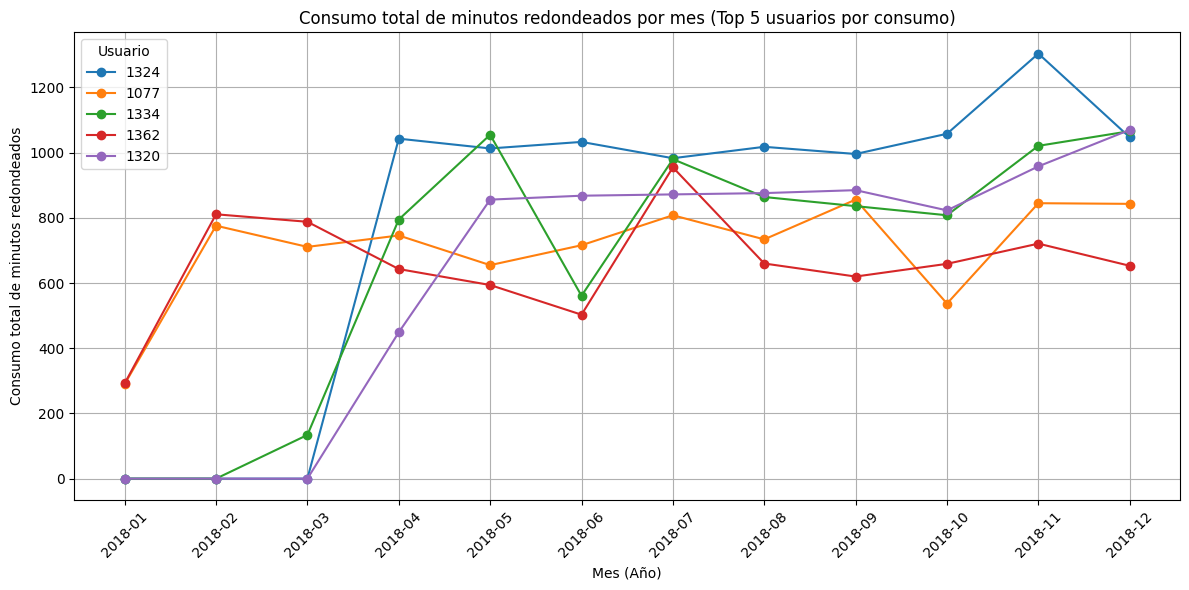

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear columna nueva de year_month
calls['call_year_month'] = calls['call_date'].dt.to_period('M')

# Agrupar por usr_id y mes para sumar la duración en consumo de minutos redondeados
consumo_per_month = calls.groupby(['user_id', 'call_year_month'])['call_duration_rounded'].sum().unstack(fill_value=0)

# Seleccionar usuarios según consumo total de duration_rounded
top_users_consumo = calls.groupby('user_id')['call_duration_rounded'].sum().sort_values(ascending=False).head(5).index

# Gráfico
plt.figure(figsize=(12, 6))

for user_id in top_users_consumo:
    if user_id in consumo_per_month.index:
        plt.plot(consumo_per_month.columns.astype(str), consumo_per_month.loc[user_id], marker='o', linestyle='-', label=f'{user_id}')

plt.title('Consumo total de minutos redondeados por mes (Top 5 usuarios por consumo)')
plt.xlabel('Mes (Año)')
plt.ylabel('Consumo total de minutos redondeados')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Usuario')
plt.tight_layout()
plt.show()

📊 Prueba con los top 5 de mayor consumo

In [31]:
import pandas as pd

# Datos correspondientes al user_id del top 5
top_users_data = users[users['user_id'].isin(top_users_consumo)]

print("Los 5 usuarios del top 5 son:")
#imprimir transpuesto
top_users_data.sample(5)


Los 5 usuarios del top 5 son:


,user_id,user_first_name,user_last_name,user_age,user_city,user_register_date,user_plan_name,user_churn_date,user_tenure_months
77,1077,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaT,87
324,1324,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,surf,NaT,84
362,1362,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,surf,NaT,87
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-02-23,surf,NaT,85
334,1334,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-03-08,surf,NaT,85


- Se observan que del top 5 de mayores consumidores de minutos por año están cuatro del Plan Surf y uno de Ultimate
- Los cinco denotan en menor o mayor grado un crecimiento mensual y exponencial. 

🔍 Verificar info

In [32]:
# Verificar info columnas
users.columns

Index(['user_id', 'user_first_name', 'user_last_name', 'user_age', 'user_city',
       'user_register_date', 'user_plan_name', 'user_churn_date',
       'user_tenure_months'],
      dtype='object')

In [33]:
# Verificar info columna nueva de call_year_month
calls.columns

Index(['call_id', 'user_id', 'call_date', 'call_duration',
       'call_duration_rounded', 'call_year_month'],
      dtype='object')

## Mensajes

In [34]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Info 'messages':")
print("\n")
messages.info()

Info 'messages':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [35]:
# Imprime una muestra de datos para los mensajes
print(messages)
messages.sample(10)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


,id,user_id,message_date
39388,1256_93,1256,2018-10-20
34513,1220_15,1220,2018-10-04
3219,1036_54,1036,2018-09-14
11763,1079_162,1079,2018-10-18
39352,1256_4,1256,2018-10-03
49781,1328_739,1328,2018-09-29
63303,1401_337,1401,2018-11-14
74716,1483_49,1483,2018-07-14
35563,1230_108,1230,2018-12-28
13494,1090_0,1090,2018-09-19


- 🔍Observaciones
  - ✏️Convertir fechas de message _date a pd.to_datetimee.
  - ✏️Verificar que no hay valores nulos
  - ✏️Dividir columnas a modo temporal

### Corregir los datos

In [36]:
#Convertir fechas de message _date a pd.to_datetimee
messages['message_date'] = pd.to_datetime(messages['message_date'])
nombre_columna = 'message_date'
print(f"Tipo de dato de la columna '{nombre_columna}' es: {messages[nombre_columna].dtype}")
print() 

#Verififar que no hay valores nulos
nulos = messages.isnull().any()
print(nulos)

Tipo de dato de la columna 'message_date' es: datetime64[ns]

id              False
user_id         False
message_date    False
dtype: bool


✅Renombrar columnas para un mejor orden

In [37]:
messages.rename(columns={
    'id': 'message_id',    
    'user_id': 'user_id',  
    'message_date': 'message_date'
}, inplace=True)

messages.columns

Index(['message_id', 'user_id', 'message_date'], dtype='object')

### Enriquecer los datos

In [38]:
# Agregar estadísticas descriptivas
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [39]:
# Columnas divididas o temporales
messages['message_year'] = messages['message_date'].dt.year
messages['message_month'] = messages['message_date'].dt.month
messages['message_day'] = messages['message_date'].dt.day
messages['message_day_of_week'] = messages['message_date'].dt.dayofweek
messages.sample(10)

,message_id,user_id,message_date,message_year,message_month,message_day,message_day_of_week
34807,1222_20,1222,2018-08-11,2018,8,11,5
67435,1438_1,1438,2018-10-01,2018,10,1,0
63899,1408_24,1408,2018-07-05,2018,7,5,3
70255,1456_193,1456,2018-10-07,2018,10,7,6
54564,1346_66,1346,2018-10-27,2018,10,27,5
2315,1028_224,1028,2018-07-22,2018,7,22,6
20869,1131_208,1131,2018-10-30,2018,10,30,1
66133,1433_73,1433,2018-10-17,2018,10,17,2
39752,1258_68,1258,2018-08-01,2018,8,1,2
39207,1255_288,1255,2018-11-12,2018,11,12,0


## Internet

In [40]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Info 'internet':")
print("\n")
internet.info()


Info 'internet':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [41]:
# Imprime una muestra de datos para el tráfico de internet
print(internet)
internet.sample(10)


              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


,id,user_id,session_date,mb_used
25712,1120_248,1120,2018-08-30,664.83
96849,1456_123,1456,2018-12-23,698.53
60393,1273_222,1273,2018-11-12,182.87
79193,1368_391,1368,2018-12-01,0.00
76248,1358_453,1358,2018-10-03,551.10
12747,1061_244,1061,2018-10-16,711.01
46124,1204_57,1204,2018-12-30,175.25
64762,1299_50,1299,2018-07-13,129.92
89318,1412_33,1412,2018-10-28,9.93
52588,1236_459,1236,2018-10-06,513.64


- 🔍Observaciones
  - ✏️ Convertir tipo de datos de session_date (de object a datetime)
  - ✏️ Analizar frecuencia de ceros, si son menos del 1%, podrían serignorados. Si son muchos, investigar su origen). Validar con el negocio si son sesiones fallidas o deben tratarse como valores ausentes.

### Corregir los datos

In [42]:
# Convertir session_date a datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

✅Renombrar columnas para un mejor orden

In [43]:
internet.rename(columns={
    'id': 'internet_id',
    'user_id': 'user_id',
    'session_date': 'internet_session_date', 
    'mb_used': 'internet_mb_used' 
}, inplace=True)

In [44]:
internet.columns

Index(['internet_id', 'user_id', 'internet_session_date', 'internet_mb_used'], dtype='object')

### Enriquecer los datos

In [45]:
# Agregar estadísticas descriptivas
internet.describe()

,user_id,internet_mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [46]:
ceros = internet[internet['internet_mb_used']==0]
print(f"Hay {len(ceros)} registros con mb_used = 0.0 ({len(ceros)/len(internet)*100:.2f}%)")

Hay 13747 registros con mb_used = 0.0 (13.11%)


  - ✏️Los 13747 registros con mb_used = 0.0 equivalen al 13.11% del total de registros.
    - Es esperable que en el ~13% de las sesiones no se consuman datos por tener acceso a apps gratuitas (no usaron datos, conexiones fallidas o apps en segundo plano)
    - Mantener registros si son válidos pues reflejan intento de uso.
      - Agrupar por user_id (patrones de uso inactivo).
      - Fallo del sistema no registró consumo. 
      - Pudiesen reemplazarse con el valor medio/mediano de usom o suprimir.
  
- Posible imputación (en caso de hacerse): 
  - Código: median_by_user = internet[internet["mb_used"] > 0].groupby("user_id")["mb_used"].median()
internet["mb_used"] = internet.apply(lambda row: median_by_user.get(row["user_id"], 0) if row["mb_used"] == 0 else row["mb_used"],
    axis=1)

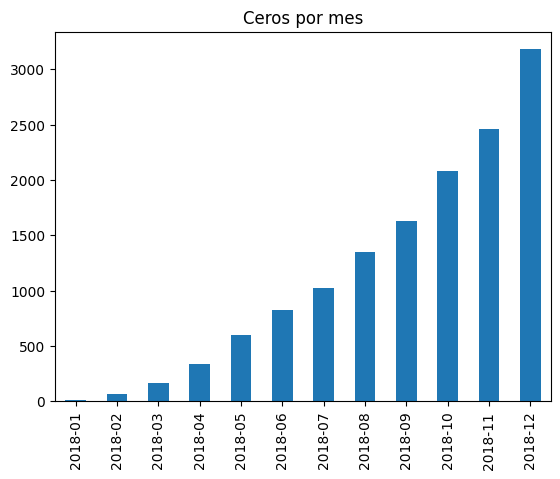

In [47]:
# Frecuencia de ceros por día y mes
ceros = internet[internet["internet_mb_used"] == 0.0].copy()
ceros["internet_session_month"] = ceros["internet_session_date"].dt.to_period("M")
ceros["internet_session_month"].value_counts().sort_index().plot(kind="bar", title="Ceros por mes")
plt.show()

  - ✏️ Usuarios con más sesiones de 0 MB

In [48]:
# Usuarios con más sesiones de 0 MB
user_zeros = ceros["user_id"].value_counts().reset_index()
user_zeros.columns = ["user_id", "internet_zero_sessions"]
top_zero_sessions = user_zeros.sort_values("internet_zero_sessions", ascending=False).head(10)
print("Los 10 usuarios con más sesiones de cero MB:")
print(top_zero_sessions)

Los 10 usuarios con más sesiones de cero MB:
   user_id  internet_zero_sessions
0     1041                     118
2     1185                     110
1     1261                     110
3     1171                     109
4     1138                     106
5     1498                      98
6     1099                      96
7     1160                      94
8     1400                      93
9     1214                      93


In [49]:
# Merge con de DataFrame 'users' para datos adicionales de los usuarios
user_info_top_10_zero = pd.merge(top_zero_sessions, users, on='user_id', how='inner')
print("\nDatos de los 10 usuarios principales con cero MB:")
user_info_top_10_zero.sample(10)


Datos de los 10 usuarios principales con cero MB:


,user_id,internet_zero_sessions,user_first_name,user_last_name,user_age,user_city,user_register_date,user_plan_name,user_churn_date,user_tenure_months
7,1160,94,Steven,Morgan,44,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-02-05,surf,NaT,86
8,1400,93,Kenton,Hickman,72,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-08,surf,NaT,85
6,1099,96,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,NaT,85
1,1185,110,Loria,Freeman,47,"Louisville/Jefferson County, KY-IN MSA",2018-01-14,ultimate,NaT,87
2,1261,110,Dusti,Forbes,31,"Kansas City, MO-KS MSA",2018-02-22,surf,NaT,86
9,1214,93,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaT,87
4,1138,106,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,NaT,86
5,1498,98,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,86
0,1041,118,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaT,85
3,1171,109,Devin,Wilkinson,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-01-27,surf,NaT,86


✅ En esta prueba, siete son del plan Surf y tres del plan Ultimate, dos son de New Jersey (contexto hipótesis dos) y todos tienen casi 90 días de ser usuarios desde su registro. Es importante recordar que hablamos de usuarios con la mayor cantidad de sesiones en 0 MB, ya sea porque no les interesa utilizar datos móviles para navegar u algún otro factor que eventualmente se analizará.

  - ✏️ Estadísticas descriptivas sin valor de cero

In [50]:
# Stats de mb_used excluyendo ceros
print(internet[internet["internet_mb_used"] > 0]["internet_mb_used"].describe())

count    91078.000000
mean       422.064206
std        255.063501
min          0.010000
25%        223.380000
50%        395.905000
75%        588.367500
max       1693.470000
Name: internet_mb_used, dtype: float64


## Estudiar las condiciones de las tarifas

| Característica             | Plan Surf                      | Plan Ultimate                   | Notas sobre el Redondeo                                                                                                                                                                                                                                                                                          |
| :------------------------- | :----------------------------- | :------------------------------ | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Pago Mensual** | \$20                           | \$70                            |                                                                                                                                                                                                                                                                                                                |
| **Minutos Incluidos** | 500 minutos/mes                | 3000 minutos/mes                | Las llamadas se redondean al minuto superior por cada llamada individual (incluso 1 segundo cuenta como 1 minuto).                                                                                                                                                                                                |
| **SMS Incluidos** | 50 SMS/mes                     | 1000 SMS/mes                    |                                                                                                                                                                                                                                                                                                                |
| **Datos Incluidos** | 15 GB/mes                      | 30 GB/mes                       | El tráfico web total del mes se redondea al gigabyte superior. Ejemplo: 1025 MB se cobran como 2 GB.                                                                                                                                                                                                            |
| **Exceso de Minutos** | 3 centavos/minuto            | 1 centavo/minuto             |                                                                                                                                                                                                                                                                                                                |
| **Exceso de SMS** | 3 centavos/SMS               | 1 centavo/SMS                |                                                                                                                                                                                                                                                                                                                |
| **Exceso de Datos** | \$10 / GB                      | \$7 / GB                       | Los megabytes se redondean a gigabytes para el cobro por exceso (siguiendo la misma lógica del redondeo mensual total).                                                                                                                                                                                           |

✅ Actualización de información de los Data Framen (nuevas columnas)

|      1 - **Plans**     |     2 - **Users**      |     3 - **Calls**      |    4 - **Messages**    |  5 - **Internet**      |
|:-----------------------|:-----------------------|:-----------------------|:-----------------------|:-----------------------|
| plan_name              |user_id                 |call_id                 |message_id              |internet_id             |
| plan_mmessage          |user_churn_date         |user_id                 |user_id                 |user_id                 |
| plan_mb                |user_city               |call_duration           |message_date            |internet_session_date   |
| plan_minutes           |user_first_name         |call_duration_rounded   |message_day             |internet_mb_used        |
| plan_monthly_usd       |user_last_name          |call_year_month         |message_month           |                        |
| plan_gb_usd_extra      |user_plan_name          |call_date               |message_day_of_week     |                        |
| plan_minute_usd_extra  |user_register_date      |                        |message_year            |                        |
| plan_message_usd_extra |user_tenure_months      |                        |                        |                        |
| plan_gb_rounded        |user_age                |                        |                        |                        |

✅ Verificación de usuarios

In [51]:
import pandas as pd

# Obtener los conjuntos únicos de user_id de cada DataFrame
users_ids = set(users['user_id'])
calls_ids = set(calls['user_id'])
messages_ids = set(messages['user_id'])
internet_ids = set(internet['user_id'])

print(f"Total de usuarios en 'users': {len(users_ids)}")
print(f"Total de usuarios en 'calls': {len(calls_ids)}")
print(f"Total de usuarios en 'messages': {len(messages_ids)}")
print(f"Total de usuarios en 'internet': {len(internet_ids)}")

# Verificar si los user_id de los servicios están contenidos en 'users'
print("\n¿Todos los user_id de 'calls' están en 'users'? ", calls_ids.issubset(users_ids))
print("¿Todos los user_id de 'messages' están en 'users'? ", messages_ids.issubset(users_ids))
print("¿Todos los user_id de 'internet' están en 'users'? ", internet_ids.issubset(users_ids))

# Identificar user_id en 'users' que no están en los servicios (si es relevante)
users_not_in_calls = users_ids - calls_ids
users_not_in_messages = users_ids - messages_ids
users_not_in_internet = users_ids - internet_ids

print("\nUsuarios en 'users' que no están en 'calls':", len(users_not_in_calls))
print("Usuarios en 'users' que no están en 'messages':", len(users_not_in_messages))
print("Usuarios en 'users' que no están en 'internet':", len(users_not_in_internet))

Total de usuarios en 'users': 500
Total de usuarios en 'calls': 481
Total de usuarios en 'messages': 402
Total de usuarios en 'internet': 489

¿Todos los user_id de 'calls' están en 'users'?  True
¿Todos los user_id de 'messages' están en 'users'?  True
¿Todos los user_id de 'internet' están en 'users'?  True

Usuarios en 'users' que no están en 'calls': 19
Usuarios en 'users' que no están en 'messages': 98
Usuarios en 'users' que no están en 'internet': 11


In [52]:
inactivos_en_calls = users_ids - calls_ids
inactivos_en_messages = users_ids - messages_ids
inactivos_en_internet = users_ids - internet_ids

# Encontrar la intersección de estos conjuntos: usuarios que no están en ninguno de los servicios
usuarios_inactivos = inactivos_en_calls.intersection(inactivos_en_messages).intersection(inactivos_en_internet)

print(f"\nNúmero de usuarios inactivos (no usaron llamadas, mensajes ni internet): {len(usuarios_inactivos)}")
print("Lista de user_id de usuarios inactivos:", usuarios_inactivos)


Número de usuarios inactivos (no usaron llamadas, mensajes ni internet): 10
Lista de user_id de usuarios inactivos: {1025, 1378, 1473, 1319, 1129, 1275, 1269, 1143, 1463, 1307}


In [53]:
# Definir el periodo de inactividad (por ejemplo, churn en 2018)
inicio_inactividad = pd.to_datetime('2018-01-01')
fin_inactividad = pd.to_datetime('2018-12-31')

# Filtrar los usuarios que tienen una churn_date dentro del periodo definido
usuarios_inactivos_por_churn = users[
(users['user_churn_date'] >= inicio_inactividad) & (users['user_churn_date'] <= fin_inactividad)
]

# Contar el número de usuarios inactivos por churn
num_usuarios_inactivos_por_churn = len(usuarios_inactivos_por_churn)

print(f"Número de usuarios que hicieron churn en 2018: {num_usuarios_inactivos_por_churn}")
print("\nLista de user_id de usuarios que hicieron churn en 2018:")
print(usuarios_inactivos_por_churn['user_id'].tolist())

Número de usuarios que hicieron churn en 2018: 34

Lista de user_id de usuarios que hicieron churn en 2018:
[1006, 1012, 1022, 1040, 1050, 1054, 1067, 1083, 1084, 1094, 1106, 1129, 1172, 1180, 1186, 1191, 1220, 1246, 1269, 1281, 1296, 1298, 1300, 1315, 1358, 1363, 1402, 1414, 1416, 1441, 1451, 1466, 1467, 1491]


- ✅ Existe una baja correlación entre los usuarios top 10 con sesiones de internet de cero megabytes y los usuarios que se dieron de baja del servicio (los 34 de churn_date) en el 2018.
- ✅ Del top 10 con mayor frecuencia de sesiones de internet sin consumo de datos, solo uno (user_id 1307) también figura en la lista de usuarios que hicieron churn.
- ✅ Sugiere que la mayoría de usuarios que experimentan muchas sesiones de cero megabytes no necesariamente abandonan el servicio. 
- ✅ Podría haber otras razones para este patrón como problemas técnicos, configuración o el uso particular del servicio entre potras.
- ✅ La razón principal de la baja de los usuarios (churn) talvez no se relaciona estrechamente con la frecuencia de sesiones - cero megabytes. Podrían se insatisfacción con el plan, precio o calidad.
- ✅ Tener muchas sesiones de internet sin consumo de datos no es indicador de que un usuario pretenda retirar el servicio (para los usuarios analizados).
- ✅ Las causas de sesiones - cero megabytes es importante investigar más a fondo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el procesamiento de tus datos! Realizaste un análisis bastante detallado para comprobar los mismos
</div>

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

🔍 Calls o llamadas.

  - Cantidades de llamadas por user_id

In [54]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_year_month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'call_year_month']).size().reset_index(name='calls_count')
print(calls_per_month.head())

   user_id call_year_month  calls_count
0     1000         2018-12           16
1     1001         2018-08           27
2     1001         2018-09           49
3     1001         2018-10           65
4     1001         2018-11           64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# TotaLlusers User_id
total_users = users['user_id'].nunique()
print(f"Número total de usuarios únicos: {total_users}")

Número total de usuarios únicos: 500


  - Duración de las llamadas por user_id (rounded)

In [56]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = calls.groupby(['user_id', 'call_year_month'])['call_duration'].sum().reset_index()
print(minutes_per_user_month.head())

   user_id call_year_month  call_duration
0     1000         2018-12         116.83
1     1001         2018-08         171.14
2     1001         2018-09         297.69
3     1001         2018-10         374.11
4     1001         2018-11         404.59


In [57]:
# Duración por user_id redondeado.
calls['call_year_month'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'call_year_month']).agg({'call_duration_rounded': 'sum'}).reset_index() 
print(calls_per_month.head(5))

   user_id call_year_month  call_duration_rounded
0     1000         2018-12                    124
1     1001         2018-08                    182
2     1001         2018-09                    315
3     1001         2018-10                    393
4     1001         2018-11                    426


🔍 Número de mensajes por user_id

In [58]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# 'message_date' tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Crea la columna 'message_month' como tipo period[M]
messages['message_month'] = messages['message_date'].dt.to_period('M')

messages_per_user_month = messages.groupby(['user_id', 'message_month'])['message_id'].count().reset_index()
print(messages_per_user_month.head())

   user_id message_month  message_id
0     1000       2018-12          11
1     1001       2018-08          30
2     1001       2018-09          44
3     1001       2018-10          53
4     1001       2018-11          36


🔍 Volumen de tráfco en internet por user_id

In [59]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['internet_session_date'] = internet['internet_session_date'].dt.to_period('M')

# 2. Sumar MB usados por mes y convertir a GB redondeando hacia arriba
traffic_per_user_month = internet.groupby(['user_id', 'internet_session_date'])['internet_mb_used'].sum().reset_index()
traffic_per_user_month['gb_total'] = np.ceil(traffic_per_user_month['internet_mb_used'] / 1024)  # Redondeo a GB superior

print(traffic_per_user_month.head())


   user_id internet_session_date  internet_mb_used  gb_total
0     1000               2018-12           1901.47       2.0
1     1001               2018-08           6919.15       7.0
2     1001               2018-09          13314.82      14.0
3     1001               2018-10          22330.49      22.0
4     1001               2018-11          18504.30      19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Con esto adecuaste los datos tal cual se indica en la descripción dada por la empresa, lo cual es un punto importante ya que siempre se debe procesar los datos considerando el funcionamiento de la empresa cómo tal
</div>

🚀 Código crítico

In [60]:
# Agrupar por user_id y mes, y sumar la duración redondeada
total_minutes_per_user_month = calls.groupby(['user_id', 'call_year_month'])['call_duration_rounded'].sum().reset_index(name='total_minutes')
# Ordenarlo de mayor a menor el DF por 'total_minutes' (opcional para la unión, pero útil para análisis)
total_minutes_per_user_month_ordenado = total_minutes_per_user_month.sort_values(by='total_minutes', ascending=False)
print(total_minutes_per_user_month.head(5))
print()
# Agrupar por user_id y mes, y contar el número de mensajes enviados
messages_per_user_month = messages.groupby(['user_id', 'message_month'])['message_id'].count().reset_index(name='total_messages')
# Ordenarlo de mayor a menor el DF por 'total_messages' (opcional para la unión, pero útil para análisis)
messages_per_user_month_ordenado = messages_per_user_month.sort_values(by='total_messages', ascending=False)
print(messages_per_user_month.head(5))
print()
# Agrupar por user_id y mes, y sumar el tráfico de internet usado
traffic_per_user_month = internet.groupby(['user_id', 'internet_session_date'])['internet_mb_used'].sum().reset_index(name='total_traffic_mb')
# Convertir MB a GB redondeando hacia arriba
traffic_per_user_month['total_traffic_gb'] = np.ceil(traffic_per_user_month['total_traffic_mb'] / 1024)  # Redondeo a GB superior
# Ordenarlo de mayor a menor el DF por 'total_traffic_gb' (opcional para la unión, pero útil para análisis)
traffic_per_user_month_ordenado = traffic_per_user_month.sort_values(by='total_traffic_gb', ascending=False)
print(traffic_per_user_month.head(5))
print()

   user_id call_year_month  total_minutes
0     1000         2018-12            124
1     1001         2018-08            182
2     1001         2018-09            315
3     1001         2018-10            393
4     1001         2018-11            426

   user_id message_month  total_messages
0     1000       2018-12              11
1     1001       2018-08              30
2     1001       2018-09              44
3     1001       2018-10              53
4     1001       2018-11              36

   user_id internet_session_date  total_traffic_mb  total_traffic_gb
0     1000               2018-12           1901.47               2.0
1     1001               2018-08           6919.15               7.0
2     1001               2018-09          13314.82              14.0
3     1001               2018-10          22330.49              22.0
4     1001               2018-11          18504.30              19.0



🚀 Estandarizar columnas mediante rename

In [61]:
df_minutes = total_minutes_per_user_month.copy()
df_messages = messages_per_user_month.copy()
df_traffic = traffic_per_user_month.copy()

# Renombrar columnas - fecha/mes
df_minutes.rename(columns={'call_year_month': 'year_month'}, inplace=True)
df_messages.rename(columns={'message_month': 'year_month'}, inplace=True)
df_traffic.rename(columns={'internet_session_date': 'year_month'}, inplace=True)

# Unir (Merge) DataFrames
# Unir minutos y mensajes
merged_df_1 = pd.merge(df_minutes, df_messages,
                       on=['user_id', 'year_month'],
                       how='outer')                  

# Unir tráfico
final_merged_df = pd.merge(merged_df_1, df_traffic,
                           on=['user_id', 'year_month'],
                           how='outer')                 

# --- Mostrar el resultado ---
print("DataFrame final unido:")
print(final_merged_df.head())

# Puedes verificar las dimensiones
print(f"\nDimensiones del DataFrame final: {final_merged_df.shape}")

DataFrame final unido:
   user_id year_month  total_minutes  total_messages  total_traffic_mb  \
0     1000    2018-12          124.0            11.0           1901.47   
1     1001    2018-08          182.0            30.0           6919.15   
2     1001    2018-09          315.0            44.0          13314.82   
3     1001    2018-10          393.0            53.0          22330.49   
4     1001    2018-11          426.0            36.0          18504.30   

   total_traffic_gb  
0               2.0  
1               7.0  
2              14.0  
3              22.0  
4              19.0  

Dimensiones del DataFrame final: (2293, 6)


🚀 Añadir tarifa de plans a final_merged_df: 
  - Columna en común (DF plans- 'plan_name' y el DF users -'user_plan_name').
  - Unir final_merged_df con DF users mediante 'user_id'.
  - Finalmente unir final_merged_df DF plans mediante 'plan_name'.

In [62]:
# Añade la información de la tarifa (plans)
merged_with_users = pd.merge(final_merged_df, users, on='user_id', how='left')
print("DataFrame después de unir con users:")
print(merged_with_users.head())

DataFrame después de unir con users:
   user_id year_month  total_minutes  total_messages  total_traffic_mb  \
0     1000    2018-12          124.0            11.0           1901.47   
1     1001    2018-08          182.0            30.0           6919.15   
2     1001    2018-09          315.0            44.0          13314.82   
3     1001    2018-10          393.0            53.0          22330.49   
4     1001    2018-11          426.0            36.0          18504.30   

   total_traffic_gb user_first_name user_last_name  user_age  \
0               2.0        Anamaria          Bauer        45   
1               7.0          Mickey      Wilkerson        28   
2              14.0          Mickey      Wilkerson        28   
3              22.0          Mickey      Wilkerson        28   
4              19.0          Mickey      Wilkerson        28   

                               user_city user_register_date user_plan_name  \
0  Atlanta-Sandy Springs-Roswell, GA MSA         2018-1

🚀 Añadir información de la tarifa (plans)

In [63]:
final_df_with_plans = pd.merge(merged_with_users, plans, left_on='user_plan_name', right_on='plan_name', how='left')
print("\nDataFrame final con información de planes:")
print(final_df_with_plans.head())
print("\nDimensiones del DataFrame final con planes:", final_df_with_plans.shape)


DataFrame final con información de planes:
   user_id year_month  total_minutes  total_messages  total_traffic_mb  \
0     1000    2018-12          124.0            11.0           1901.47   
1     1001    2018-08          182.0            30.0           6919.15   
2     1001    2018-09          315.0            44.0          13314.82   
3     1001    2018-10          393.0            53.0          22330.49   
4     1001    2018-11          426.0            36.0          18504.30   

   total_traffic_gb user_first_name user_last_name  user_age  \
0               2.0        Anamaria          Bauer        45   
1               7.0          Mickey      Wilkerson        28   
2              14.0          Mickey      Wilkerson        28   
3              22.0          Mickey      Wilkerson        28   
4              19.0          Mickey      Wilkerson        28   

                               user_city  ... user_tenure_months  \
0  Atlanta-Sandy Springs-Roswell, GA MSA  ...             

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

 🚀 Calcula el ingreso mensual para cada usuario

In [64]:
# Calcular ingreso mensual por usuario
# Resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; luego multiplica resultado segun el valor del plan respectivo de mensajes
# Añade la tarifa mensual en función del plan de mensajes
import numpy as np
import pandas as pd

# Ingreso mensual monthly_income
final_df_with_plans['monthly_income'] = \
    final_df_with_plans['plan_monthly_usd'] + \
    (final_df_with_plans['plan_message_usd_extra'].fillna(0) * np.maximum(0, final_df_with_plans['total_messages'] - final_df_with_plans['plan_messages'])) + \
    (final_df_with_plans['plan_minute_usd_extra'].fillna(0) * np.maximum(0, final_df_with_plans['total_minutes'] - final_df_with_plans['plan_minutes'])) + \
    (final_df_with_plans['plan_gb_usd_extra'].fillna(0) * np.maximum(0, final_df_with_plans['total_traffic_gb'] - (final_df_with_plans['plan_mb'] / 1024)))

# Ingreso mensual redondeado monthly_income_rounded hacia arriba con ceil.
final_df_with_plans['monthly_income_rounded'] = np.ceil(final_df_with_plans['monthly_income'])

print("Primeras filas del DataFrame con 'monthly_income' y 'monthly_income_rounded':")
print(final_df_with_plans.head())

Primeras filas del DataFrame con 'monthly_income' y 'monthly_income_rounded':
   user_id year_month  total_minutes  total_messages  total_traffic_mb  \
0     1000    2018-12          124.0            11.0           1901.47   
1     1001    2018-08          182.0            30.0           6919.15   
2     1001    2018-09          315.0            44.0          13314.82   
3     1001    2018-10          393.0            53.0          22330.49   
4     1001    2018-11          426.0            36.0          18504.30   

   total_traffic_gb user_first_name user_last_name  user_age  \
0               2.0        Anamaria          Bauer        45   
1               7.0          Mickey      Wilkerson        28   
2              14.0          Mickey      Wilkerson        28   
3              22.0          Mickey      Wilkerson        28   
4              19.0          Mickey      Wilkerson        28   

                               user_city  ... plan_mb plan_minutes  \
0  Atlanta-Sandy Sprin

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con la agregación y el cálculo de los ingresos mensuales según las condiciones dadas
</div>

## Estudia el comportamiento de usuario

### Llamadas

In [65]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla
# Unir calls y users para información de plan
calls = pd.merge(calls, users[['user_id', 'user_plan_name']], on='user_id', how='left')

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['year_month'] = calls['call_date'].dt.to_period('M')

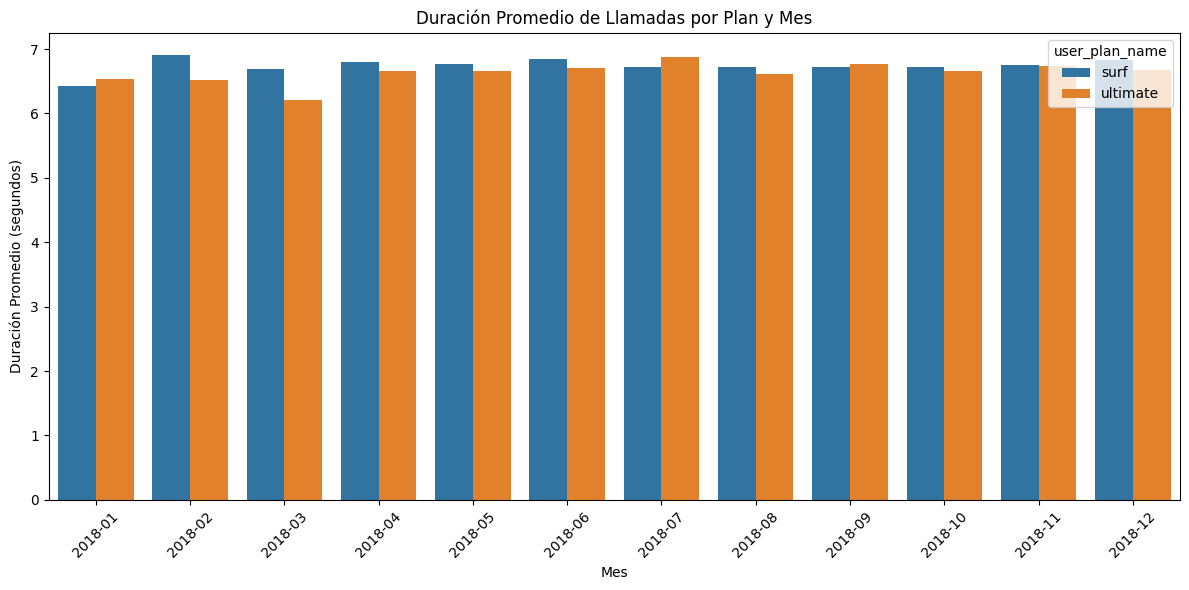

In [66]:
# Group by user_plan_name y year_month (average call duration)
average_duration_per_plan_month = calls.groupby(['user_plan_name', 'year_month'])['call_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='call_duration', hue='user_plan_name', data=average_duration_per_plan_month)
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
average_duration_per_plan = calls.groupby('user_plan_name')['call_duration'].mean().reset_index(name='average_duration')
print("\nPromedio general de duración de llamadas por plan:")
print(average_duration_per_plan)


Promedio general de duración de llamadas por plan:
  user_plan_name  average_duration
0           surf          6.767264
1       ultimate          6.699939


In [68]:
print(average_duration_per_plan_month)

   user_plan_name year_month  call_duration
0            surf    2018-01       6.428000
1            surf    2018-02       6.906175
2            surf    2018-03       6.696919
3            surf    2018-04       6.799918
4            surf    2018-05       6.769200
5            surf    2018-06       6.846812
6            surf    2018-07       6.721710
7            surf    2018-08       6.726164
8            surf    2018-09       6.728684
9            surf    2018-10       6.722302
10           surf    2018-11       6.759115
11           surf    2018-12       6.836607
12       ultimate    2018-01       6.541518
13       ultimate    2018-02       6.517230
14       ultimate    2018-03       6.210906
15       ultimate    2018-04       6.659990
16       ultimate    2018-05       6.662443
17       ultimate    2018-06       6.705188
18       ultimate    2018-07       6.879085
19       ultimate    2018-08       6.613484
20       ultimate    2018-09       6.770040
21       ultimate    2018-10    

🚀 Comparativa:
  - Estable y constante mes a mes para ambos planes
  - No existen picos o caídas drásticas importantes a lo largo del tiempo.
  - Comportamento predecible
  - Duración Promedio muy parecida ("surf" ~6.77 segundos y "ultimate" ~6.70 segundos, aproximadamente 0.07 segundos).
  - El plan "surf" muestra un patrón más consistente y un tanto superior al plan "ultimate" en la mayoría de los meses es pequeña y la mayorñía muy simlares como sept, oct y nov.

🚀 Surf:
  - Ligeramente mayor.
  - Mayor variabilidad.
 
🚀 Plan Ultimate:
  - Ligeramente menor
  - Mayor consistencia mensual a lo largo del año aunque en menor peso que Surf 

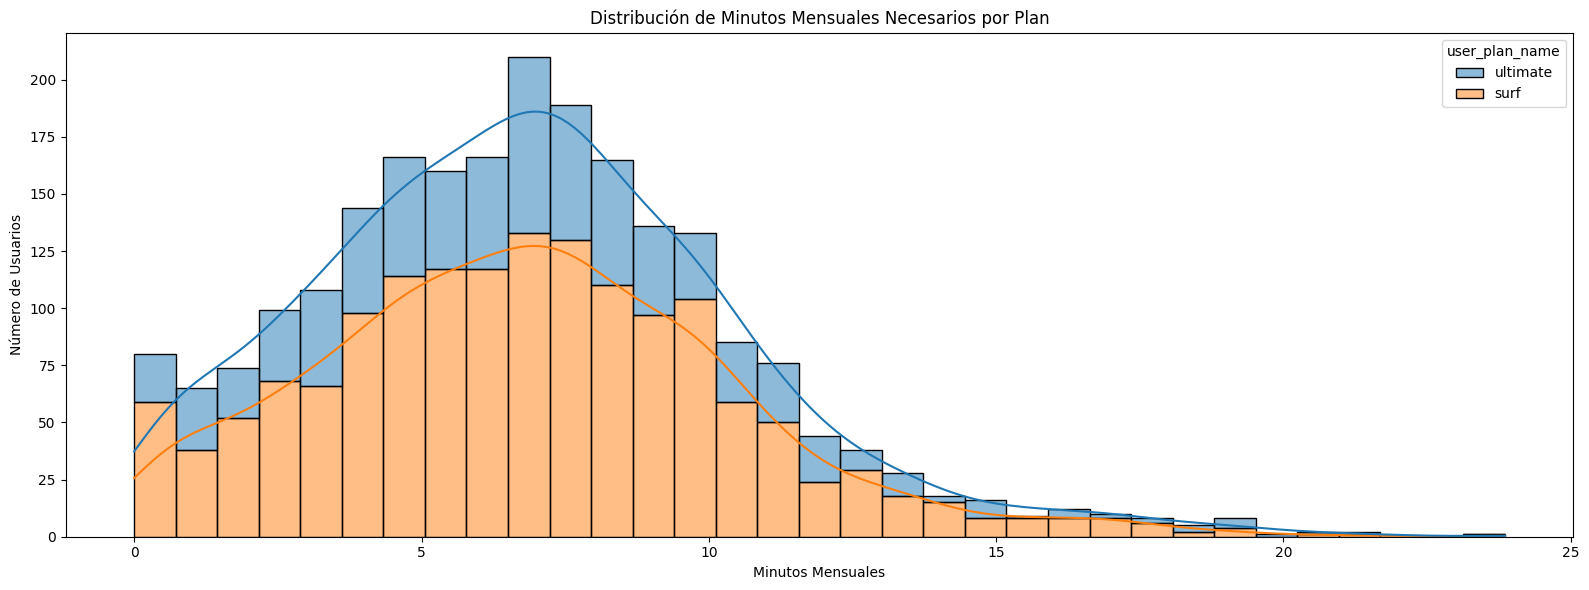

In [69]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

total_minutes_per_user_plan_month = calls.groupby(['user_id', 'user_plan_name', 'year_month'])['call_duration'].sum().reset_index()
total_minutes_per_user_plan_month['total_minutes'] = total_minutes_per_user_plan_month['call_duration'] / 60

plt.figure(figsize=(16, 6))
sns.histplot(data=total_minutes_per_user_plan_month, x='total_minutes', hue='user_plan_name', kde=True, multiple='stack')
plt.title('Distribución de Minutos Mensuales Necesarios por Plan')
plt.xlabel('Minutos Mensuales')
plt.ylabel('Número de Usuarios')
plt.tight_layout()
plt.show()

🚀 Comparativa:
  - Ambas distribuciones sesgadas hacia la derecha (común en el uso de servicios). Indica que la mayoría de los usuarios consumen menos minutos, pero una cola consume cantidades mayores. 
  - Muchos de uso moderado y menos de uso muy alto. 
  - Concentración en rangos bajos, de usuarios que utilizan una cantidad relativamente baja de minutos mensuales, resaltando entre 0 y 15 minutos.
  - Se refleja la diferencia en los límites de minutos por plan, los usuarios de Ultimate con un límite mucho mayor están más confiados en realizar llamadas más largas y con mayor frecuecia en la cola larga.
      
🚀 Surf:
  - Surf tiene más cola a la derecha, posiblemente valores atípicos (tendencia al sobre uso del plan beneficioso para captar ingresos por excedentes.
  - Pico de "Surf" un poco más alto y tardío o desplazado a la derecha
  - Mayor cantidad de minutos en comparación con el pico de "ultimate"
  - La mayor cantidad de usuarios se concentran en un rango de minutos mensuales un poco superior a "ultimate".
  - Entre 5-10 minutos mensuales surf presenta su concentración más alta de uso.
  - Menor número de usuarios en rangos altos, entre 15 y 20 minutos la cantidad de usuarios disminuye más rápido que "Ultimate", aunque siempre bajo para ambos planes de todas formas.
  
  
🚀 Plan Ultimate:
  - Distribución más amplia o dispersa, con una cola hacia la derecha
  - Al igual que surf la mayoría de los usuarios usan pocos minutos, pero muestra un consumo mayor en comparación con "surf".
  - Una proporción mayor de usuarios consumen cantidades de minutos más elevadas. 
  - Más usuarios en rangos bajos entre 0 y 5 minutos, mñas alto que Surf, más usuarios utilizan una cantidad muy pequeña de minutos mensuales.
  - Consumo de minutos más alto en comparación con Surf, aunque la cantidad total de usuarios es menor.
  
  

In [70]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_duration_by_user_plan = calls.groupby(['user_id', 'year_month', 'user_plan_name'])['call_duration'].sum().reset_index(name='total_monthly_duration')

# Calcular la media de la duración mensual por plan
mean_duration_by_plan = monthly_duration_by_user_plan.groupby('user_plan_name')['total_monthly_duration'].mean()
print("\nMedia de la duración mensual de llamadas por plan:")
print(mean_duration_by_plan)

# Calcular la varianza de la duración mensual por plan
variance_duration_by_plan = monthly_duration_by_user_plan.groupby('user_plan_name')['total_monthly_duration'].var()
print("\nVarianza de la duración mensual de llamadas por plan:")
print(variance_duration_by_plan)


Media de la duración mensual de llamadas por plan:
user_plan_name
surf        412.097890
ultimate    410.180954
Name: total_monthly_duration, dtype: float64

Varianza de la duración mensual de llamadas por plan:
user_plan_name
surf        47001.254231
ultimate    50510.631705
Name: total_monthly_duration, dtype: float64


🚀Media Similar, aprox. 412 segundos Surf y 410 segundos Ultimate. Cantidad de tiempo mensual casi idéntica.
- 🔢 Mayor Varianza Ultimate, aprox. 50511 en comparación con Surf de 47001 ( más dispersión en cantidad de minutos que hablan los usuarios de Ultimate mensualmente.
- 🔢El comportamiento de uso de minutos es más variado en Ultimate que en Surf (más homogéneo alrededor de la media).

Tipo de dato de 'user_plan_name': object


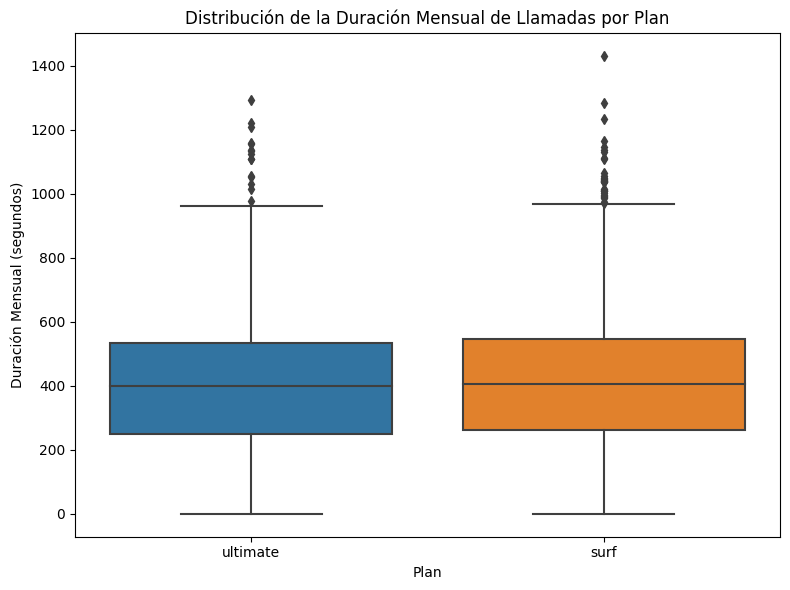

In [71]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

monthly_duration = calls.groupby(['user_id', 'year_month'])['call_duration'].sum().reset_index()

# Unir monthly_duration con users mediante user_id
monthly_duration = pd.merge(monthly_duration, users[['user_id', 'user_plan_name']], on='user_id', how='left')

# Verificar tipo de dato columna user_plan_name
print(f"Tipo de dato de 'user_plan_name': {monthly_duration['user_plan_name'].dtype}")

# Si no es tipo object o category convertir a object
if monthly_duration['user_plan_name'].dtype not in ['object', 'category']:
    monthly_duration['user_plan_name'] = monthly_duration['user_plan_name'].astype(object)
    print(f"Tipo de dato de 'user_plan_name' después de la conversión: {monthly_duration['user_plan_name'].dtype}")

# Crear diagrama
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_plan_name', y='call_duration', data=monthly_duration)
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual (segundos)')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Revisar por cada mes y por cada grupo ayuda mucho a realizar la comparación con las gráficas, buen trabajo
</div>


📦 Boxplot

🚀 Plan Ultimate:
  - Mediana: Dentro de la caja, 380 segundos aprox. (valor medio del 50% de usuasrios) 
  - Rango Intercuartílico (IQR), altura de caja indica que contiene el 50% central de los datos. Para Ultimate el rango se extiende aprox. de 250 Q1 a 550 Q3 segundos.
  - Bigotes: Se extienden hasta 1.5 veces el IQR desde los cuartiles. De o a 950 segundos en extremo superior (dispersión)
  - Valores Atípicos, por encima del bloque superior aunque no en cantidadaes extremas.
  
🚀 Surf:
  - Mediana: levemente inferior a Ultimate, alrededor de 400 segundos.
  - Rango Intercuartílico (IQR): similar a Ultimate en tamaño Q1 250 - Q3 550 segundos.
  - Bigotes: De o a 950 segundos en extremo superior y muestran dispersión como Ultimate.
  - Valores Atípicos: Valores atípicos en duraciones mensuales más largas superiores a los 1400 segundos.

🧠 Conclusiones generales en calls (llamadas):

Gráfico de Barras: Duración Promedio de Llamadas por Plan y Mes:
- Duración promedio de llamadas similar en ambos planes, estable mes a mes y Surf muestra un promedio ligeramente superior).

Histograma: Distribución de Minutos Mensuales Necesarios por Plan:
- Ambos planes con alta concentración de usuarios usando una cantidad relativamente baja de minutos mensuales. Surf con mayor concentración entre 5-10 minutos y Ultimate con una cola más larga hacia mayor consumo pero con menos usuarios.

Diagrama de Caja: Distribución de la Duración Mensual de Llamadas por Plan:
- Mediana de duración mensual similar en ambos planes, 380 ultimate y 400 segundos Surf.
- Dispersión del 50% central de usuarios comparable con diferencia en valores atípicos destacando el plan Surf.

Media y Varianza de la Duración Mensual de Llamadas por Plan:
- Media:Similar en ambos planes:
  - Surf: aprox. 412 segundos.
  - Ultimate: aprox. 410 segundos.
- Varianza: Ligeramente mayor en plan Ultimate
  - Surf: aprox. 47,001 segundos cuadrados.
  - Ultimate: aprox. 50,511 segundos cuadrados. 
  
Resumen General:
- Comportamiento típico similar en duración promedio por llamada y cantidad total de minutos consumidos mensualmente (en promedio). El plan Surf distingue por un consumo mensual de llamadas excepcionalmente alto, mientras que Ultimate mayor variabilidad en el uso mensual.

### Mensajes

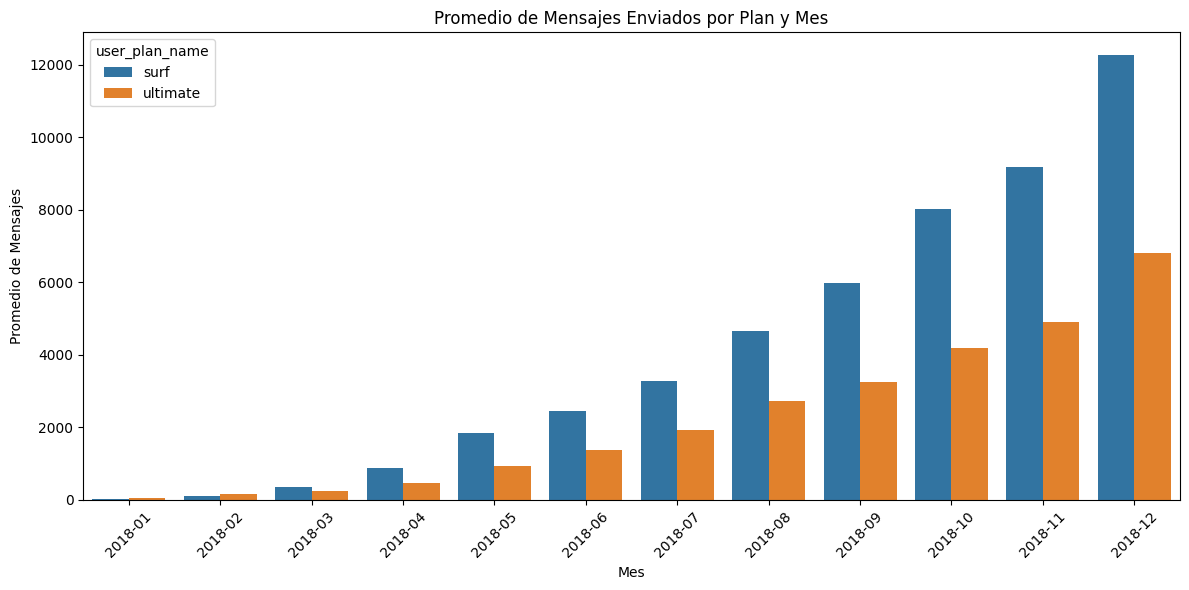

In [72]:
# Compara el promedio mensual de mensajes enviados por los usuarios de cada plan.

messages = pd.merge(messages, users[['user_id', 'user_plan_name']], on='user_id', how='left')

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['year_month'] = messages['message_date'].dt.to_period('M')

average_messages_per_plan_month = messages.groupby(['user_plan_name', 'year_month']).size().reset_index(name='average_messages')

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month', y='average_messages', hue='user_plan_name', data=average_messages_per_plan_month)
plt.title('Promedio de Mensajes Enviados por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Mensajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🚀 Comparativa:
  - Tendencia General Creciente: Ambos planes crecen en promedio de mensajes enviados en 2018. Sugiere aumento del uso de mensajes en ambos planes.
  - Surf lidera en cantidad promedio en casi todos los meses, con un promedio de mensajes mayor.
  - La diferencia en promedio se acentúa con el tiempo. 
  - A pesar de la diferencia en cantidad, ambos planes siguen patrones mensuales de cambio. Si aumenta promedio de mensajes en un mes con Surf, también aumenta similarmente Ultimate aunque en menor grado.
  - Los usuarios de Surf son propensos a mensajesde forma regular y en mayor cantidad, talvez por características del plan (límite SMS, costos por excedentes o los perfiles de usuarios).

El plan Surf tiene un promedio de mensajes mayor que Ultimate en todo el año, aunque ambos tienden a aumentar, Surf aumenta exponencialmente mucho más.

In [73]:
# Analiza la distribución de la cantidad mensual de mensajes enviados por los usuarios

🚀 Comparativa:
  - Estable y constante mes a mes para ambos planes
  - No existen picos o caídas drásticas importantes a lo largo del tiempo.
  - Comportamento predecible
  - Duración Promedio muy parecida ("surf" ~6.77 segundos y "ultimate" ~6.70 segundos, aproximadamente 0.07 segundos).
  - El plan "surf" muestra un patrón más consistente y un tanto superior al plan "ultimate" en la mayoría de los meses es pequeña y la mayorñía muy simlares como sept, oct y nov.

🚀 Surf:
  - Ligeramente mayor.
  - Mayor variabilidad.
 
🚀 Plan Ultimate:
  - Ligeramente menor
  - Mayor consistencia mensual a lo largo del año aunque en menor peso que Surf 

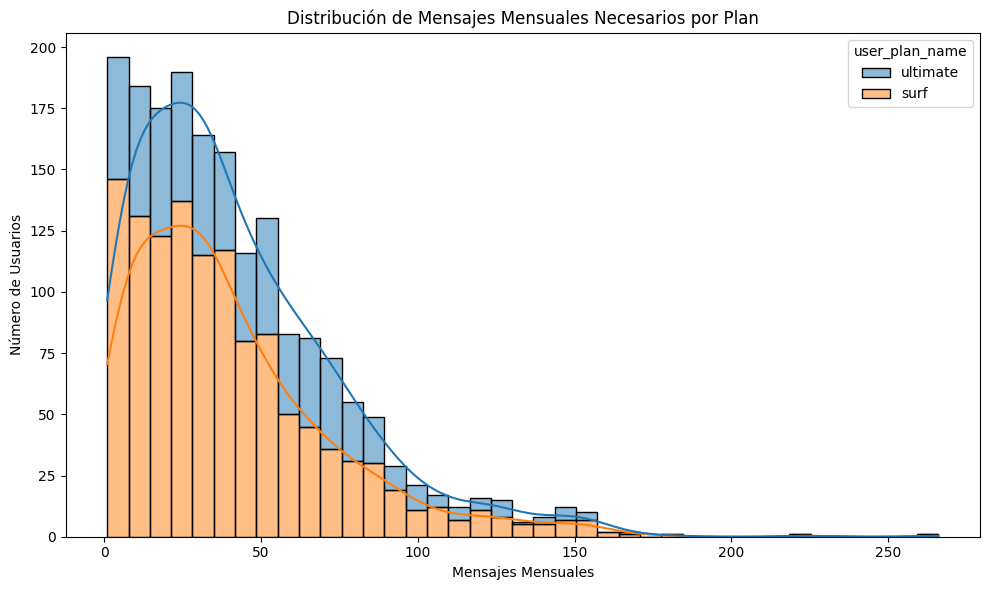

In [74]:
# Comparar número de mensajes mensuales que necesitan los usuarios de cada plan.

total_messages_per_user_plan_month = messages.groupby(['user_id', 'user_plan_name', 'year_month'])['message_id'].count().reset_index(name='total_messages')

plt.figure(figsize=(10, 6))
sns.histplot(data=total_messages_per_user_plan_month, x='total_messages', hue='user_plan_name', kde=True, multiple='stack')
plt.title('Distribución de Mensajes Mensuales Necesarios por Plan')
plt.xlabel('Mensajes Mensuales')
plt.ylabel('Número de Usuarios')
plt.tight_layout()
plt.show()


🚀 Comparativa:
  - Concentración en rangos bajos en ambos planes, con picos en rangos inferiores (aprox. entre 0 y 50 mensajes).
  - Ultimate con mayor proporción de usuarios que envían una cantidad muy pequeña de mensajes (cercana a 0).
  - La distribución en Surf se extiende más a la derecha, con mayor cantidad de usuarios que envían un número moderado de mensajes (entre 20 y 80) en comparación con Ultimate.
  - Ambos planes con cola a la derecha, por usuarios que envían una cantidad significativamente mayor de mensajes, aunque menos frecuentes.
  - Ultimate con menos usuarios de alto uso, disminuye más rápido la cola en comparación a Sur.

    Ambos planes tienen gran cantidad de usuarios que envían pocos mensajes, pero Surf tiene mayor proporción de usuarios que envían una cantidad moderada, mientras que Ultimate mayor concentración en muy pocos mensajes. En ambos existen usuarios que envían muchos mensajes, pero más común en el plan Surf.

In [75]:
# Calcula la media y la varianza de la cantidad mensual de GB consumidos.

monthly_messages_by_user_plan = messages.groupby(['user_id', 'year_month', 'user_plan_name'])['message_id'].count().reset_index(name='total_monthly_messages')

# Calcular la media de la cantidad mensual de mensajes por plan
mean_messages_by_plan = monthly_messages_by_user_plan.groupby('user_plan_name')['total_monthly_messages'].mean()
print("\nMedia del número mensual de mensajes por plan:")
print(mean_messages_by_plan)

# Calcular la varianza de la cantidad mensual de mensajes por plan
variance_messages_by_plan = monthly_messages_by_user_plan.groupby('user_plan_name')['total_monthly_messages'].var()
print("\nVarianza del número mensual de mensajes por plan:")
print(variance_messages_by_plan)


Media del número mensual de mensajes por plan:
user_plan_name
surf        40.109656
ultimate    46.296233
Name: total_monthly_messages, dtype: float64

Varianza del número mensual de mensajes por plan:
user_plan_name
surf        1091.344231
ultimate    1085.183108
Name: total_monthly_messages, dtype: float64


🚀 Interpretación:
   - La media ligeramente superior en plan Ultimate (46 mensajes al mes) podría deberse al mayor límite de SMS incluido en el plan Ultimate, reduciendo la preocupación por exceder los costos extras.
   - Similitud en dispersión entre ambos planes (1091 Surf y 1085 Ultimate. 
   - La similitud en la varianza podría sugerir que factores que impulsan la variabilidad (hábitos de comunicación personal, RRSS y otros) son consistentes en ambos planes, independientemente del límite específico de su plan. La leve diferencia podría obedecer al límite más amplio para Ultimate.
   - Marketing y segmentación. Las estrategias podrían enfocarse en límites de SMS como el diferenciador clave, pero el uso muestra una superposición considerable en el comportamiento.
   - Si bien es cierto ha disminuido el uso de SMS debido a nuevas apps de mensajería instantánea, las métricas sugieren que  aún en ambos planes se utilizan. La media de 40-46 mensajes indica una frecuencia relevante.
   - Oportunidades de Upselling y Downselling para ofrecer planes más adecuados a las necesidades. Los usuarios de Ultimate con un uso consistentemente bajo de mensajes, pueden ser candidatos para un plan más económico. Por otro lado, los de Surf que superan con frecuencia el límite pueden ser persuadidos a cambiarse hacia Ultimate.
   
    Ultimate muestra una ligera tendencia a enviar más, pero la variabilidad es similar en ambos planes. Los límites inluyen marginalmente en el promedio, pero los patrones de comunicación por SMS son consistentes.

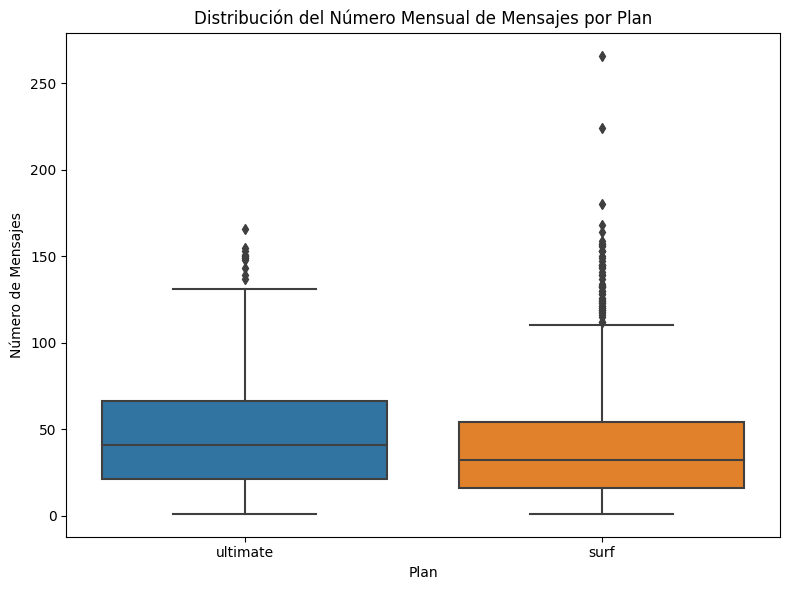

In [76]:
# Diagrama de caja para visualizar la distribución de la cantidad mensual de GB consumidos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct DataFrame for monthly messages
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_plan_name', y='total_monthly_messages', data=monthly_messages_by_user_plan)
plt.title('Distribución del Número Mensual de Mensajes por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes')
plt.tight_layout()
plt.show()

📦 Boxplot

🚀 Plan Ultimate:
  - Mediana: El centro está alrededor de los 30 mensajes mensuales.
  - Rango Intercuartílico (IQR): Abarca desde casi 15 mensajes (Q1) a 65 mensajes (Q3). El 50% envían este rango de mensajes.
  - Bigotes: Se extienden de 0 a 130 mensajes. Dispersión típica de uso de mensajes para la mayoría de los usuarios.
  - Valores Atípicos: Por encima del bigote superior, algunos envían 130 mensajes y hasta 160 mensajes al mes.
  
🚀 Surf:
  - Mediana: El centro está en torno a los 35 mensajes mensuales, levemente superior a Ultimate.
  - Rango Intercuartílico (IQR): Abarca de 10 mensajes (Q1) a 55 mensajes (Q3). 50% central envían esta cantidad.
  - Bigotes: Se extienden de 0 mensajes a 110 mensajes.
  - Valores Atípicos: usuarios envían más de 110 mensajes al mes incluso más altos que en Ultimate, hasta 270 mensajes.

🧠 Conclusiones generales de calls y messages:

- Llamadas:
  - La media de duración mensual es similar en ambos planes (de 410-412 segundos). 
  - La varianza es ligeramente mayor en Ultimate, una mayor dispersión en cantidad de minutos que sigiere mayor amplitud en patrones de uso de voz.


- Mensajes:
  - La media de mensajes es ligeramente mayor en Ultimate (46 mensajes) que en Surf (40 mensajes). Ultimate envía un poco más mensajes al mes.
  - La varianza similar en ambos planes (1085-1091), dispersión comparable en cantidad de mensajes mensuales o variabilidad similar.

Ambos planes muestran un comportamiento muy similar tanto en duración de llamadas como cantidad de mensajes. Diferencia marginal en llamadas y más notable en mensajes a favor del Ultimate. Plan Ultimate presenta mayor dispersión en duración de llamadas, gama más amplia de necesidades, por otro lado, la varianza en mensajes muy similar en ambos planes. Los factores de variabilidad de envío SMS son consistentes en ambos.

Existen ligeras diferencias en uso promedio y variabilidad, pero ambos atienden suarios con necesidades de comunicación que se superponen en términos de volumen total. Lás más significativas en extremos de uso (valores atípicos).

### Internet

Tipo de dato de internet['internet_session_date'] antes de la conversión: period[M]


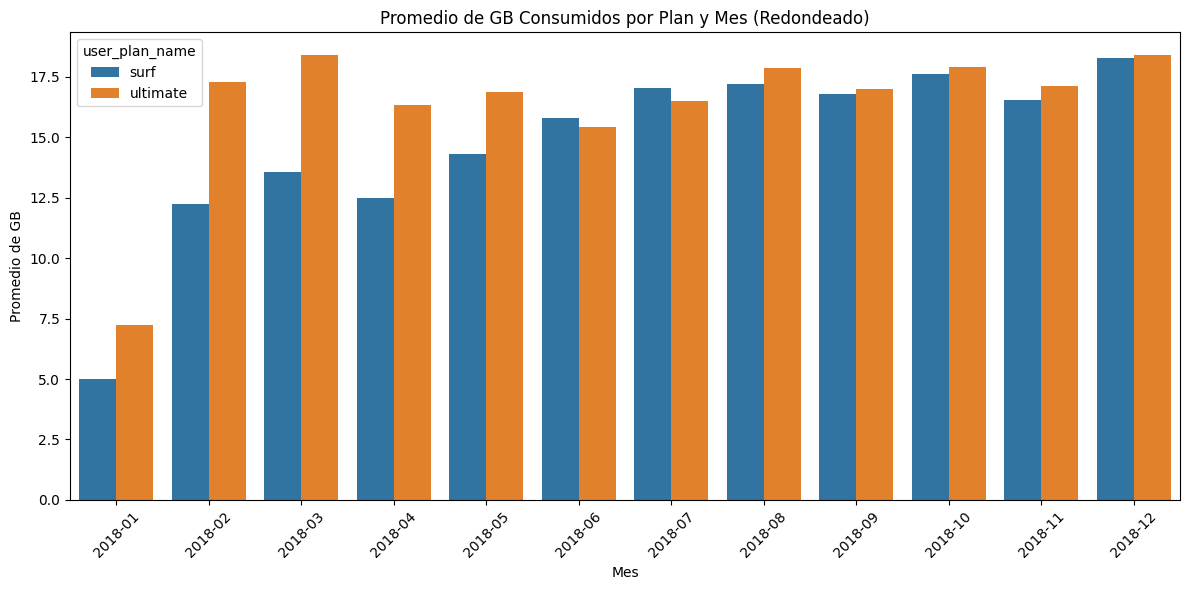

In [77]:
# Compara el promedio de GB consumidos por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tipo de dato internet_session_date
print(f"Tipo de dato de internet['internet_session_date'] antes de la conversión: {internet['internet_session_date'].dtype}")

# Convertir internet_session_date'a datetime
if pd.api.types.is_period_dtype(internet['internet_session_date'].dtype):
    internet['internet_session_date'] = internet['internet_session_date'].dt.to_timestamp()
else:
    internet['internet_session_date'] = pd.to_datetime(internet['internet_session_date'])

internet['year_month'] = internet['internet_session_date'].dt.to_period('M')

# Convertir MB a GB y redondeo mensual
internet['internet_gb_used'] = internet['internet_mb_used'] / 1024
monthly_gb_used = internet.groupby(['user_id', 'year_month'])['internet_gb_used'].sum().reset_index()
monthly_gb_used['total_gb_rounded'] = monthly_gb_used['internet_gb_used'].apply(lambda x: x.round(0) if x == int(x) else int(x) + 1)

# Unir monthly_gb_used y users (info plan)
monthly_gb_used = pd.merge(monthly_gb_used, users[['user_id', 'user_plan_name']], on='user_id', how='left')

monthly_gb_used['year_month_str'] = monthly_gb_used['year_month'].astype(str)

# Compara el promedio de GB consumidos por cada plan y por cada mes.
average_gb_per_plan_month = monthly_gb_used.groupby(['user_plan_name', 'year_month_str'])['total_gb_rounded'].mean().reset_index(name='average_gb')

plt.figure(figsize=(12, 6))
sns.barplot(x='year_month_str', y='average_gb', hue='user_plan_name', data=average_gb_per_plan_month)
plt.title('Promedio de GB Consumidos por Plan y Mes (Redondeado)')
plt.xlabel('Mes')
plt.ylabel('Promedio de GB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🚀 Iterpretación:
- Diferencia constante con tendencia Similar: En 2018 plan ultimate muestra un promedio de consumo de GB importante, mayor que Surf en casi todos los meses.
- Ambos planes con tendencia al aumento (esperable en la industria por el creciente uso de apps y contenido multimedia)
- La segmentación por plan es efectiva según necesidad de datos. Ultimate con mayor límites atrae y retiene a clientes de mayor demanda de datos. 
- La tendencia al aumento es razón para revisar límites de datos en los planes, mantener competitividad y satisfacer demanda.
- Ultimate está por encima, pero ambos planes fluctúan indicando posibles factores externos compartidos (lanzamientos de aplicaciones populares, periodos vacacionales de más consumo en entretenimiento y oros más).
- Analizar picos y valles para hallar información sobre comportamiento del usuario influenciado por eventos externos.
- Oportunidad de "Upselling" y "Downselling": Brecha constante, upselling (mover usuarios de Surf que se acercan o superan límites, hacia Ultimate) o downselling (alternativas económicas a usuarios de  Ultimate con un consumo bajo).
- Valor percibido y precio: Disposición de Ultimate a mayor consumo de datos justifica precio más alto del plan. La diferencia en consumo promedio puede ser clave en la diferencia percibida entre ambos planes. Validar la elasticidad del precio en estos niveles de consumo para optimizar los ingresos.
- Mayor demanda promedio y tendencia creciente en Ultimate amerita infraestructura de red robusta. Se debe anticipar crecimiento constante para evitar congestión y asegurara una experiencia de calidad.

Clara segmentación en necesidad de datos (Ultimate - usuarios de alto consumo). Tendencia creciente en ambos planes obliga a prever capacidad de datos a largo plazo. 

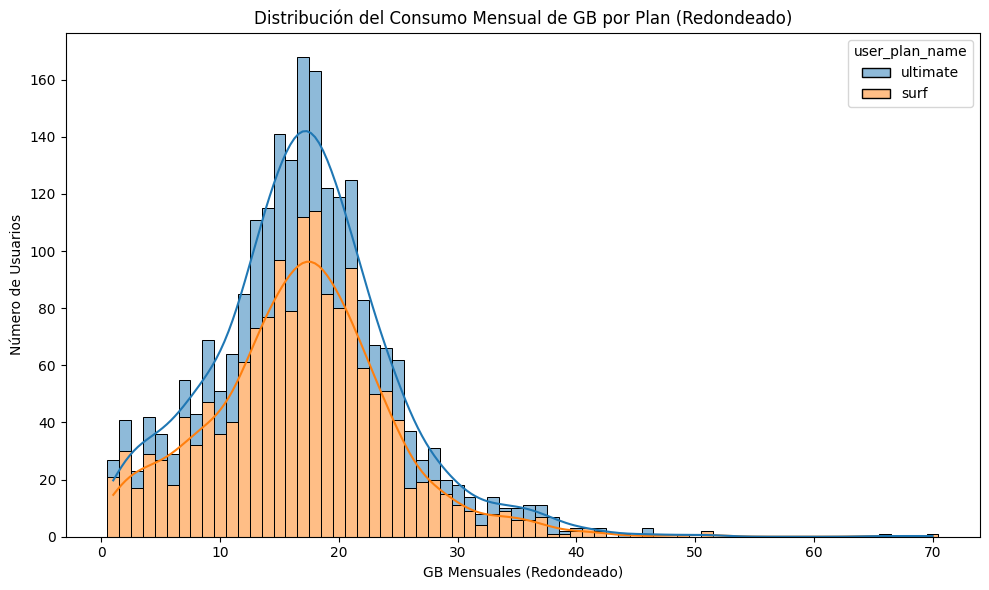

In [78]:
#Compara la cantidad de GB mensuales que tienden a consumir los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(10, 6))
sns.histplot(data=monthly_gb_used, x='total_gb_rounded', hue='user_plan_name', kde=True, multiple='stack', discrete=True)
plt.title('Distribución del Consumo Mensual de GB por Plan (Redondeado)')
plt.xlabel('GB Mensuales (Redondeado)')
plt.ylabel('Número de Usuarios')
plt.tight_layout()
plt.show()

🚀 Interpretación:

- Patrones de consumo de datos distintos pero superpuestos:
  - Surf atrae usuarios con un consumo mensual de datos moderado, rango de 10-20 GB. Ultimate es más amplio, con pico moderado hacia la derecha, 15-25 GB; pero mayor consumo de datos (más de 25 GB).

  - Los límites de datos impactan o influyen en comportamiento del usuario. Límite inferior Surf restringe consumo y límite superior Ultimate permite uso más intenso sin preocupación por exceder costos.

  - Superposición en el rango de consumo moderado (10-25 GB) indica áreas para la optimización de los planes. Usuarios Ultimate se pueden beneficiar de un plan intermedio y usuarios Surf que se acercan al límite ser candidatos al Ultimate.

  - La cola más larga y pronunciada a la derecha de Ultimate son usuarios de alto valor que consumen una cantidad significativa de datos, un diferenciador clave para Ultimate que justifica su precio elevado y confirma la necesidad de límites generosos.

  - Mayor proporción de usuarios de alto consumo Ultimate amerita mayor capacidad de red y gestión del ancho de banda para asegurar una experiencia de alta calidad a este segmento diferenciado.

  - Plan Surf es un mercado masivo y de datos moderadas. Ultimate de grupo más diverso y de usuarios más inmtensos en uso de datos. Considerar patrones para depurar propuesta de valor y ofertas que optimicen la asignación de recursos de red.

In [79]:
# Calcula la media y la varianza de la cantidad mensual de GB consumidos.
mean_gb_by_plan = monthly_gb_used.groupby('user_plan_name')['total_gb_rounded'].mean()
variance_gb_by_plan = monthly_gb_used.groupby('user_plan_name')['total_gb_rounded'].var()

print("\nMedia del consumo mensual de GB por plan (Redondeado):")
print(mean_gb_by_plan)
print("\nVarianza del consumo mensual de GB por plan (Redondeado):")
print(variance_gb_by_plan)


Media del consumo mensual de GB por plan (Redondeado):
user_plan_name
surf        16.831194
ultimate    17.331015
Name: total_gb_rounded, dtype: float64

Varianza del consumo mensual de GB por plan (Redondeado):
user_plan_name
surf        59.473734
ultimate    58.494733
Name: total_gb_rounded, dtype: float64


🚀 Entre las diferencias en límites de datos en ambos planes, el consumo promedio mensual de GB redondeado es casi idéntico (17 GB). Pero la varianza es levemente mayor en Surf, una dispersión un poco más amplia en patrones de uso o más heterogeneidad en necesidades de datos. Por su lado, Ultimate muestra consumo promedio similar pero con variabilidad menor.

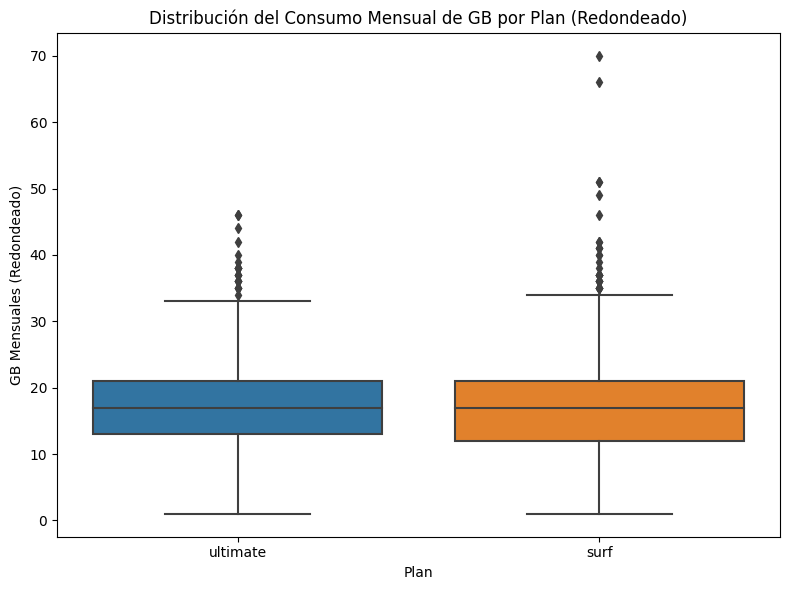

In [80]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de GB consumidos.
plt.figure(figsize=(8, 6))
sns.boxplot(x='user_plan_name', y='total_gb_rounded', data=monthly_gb_used)
plt.title('Distribución del Consumo Mensual de GB por Plan (Redondeado)')
plt.xlabel('Plan')
plt.ylabel('GB Mensuales (Redondeado)')
plt.tight_layout()
plt.show()

📦 Boxplot

🚀 Aúj con medias de consumo similar en GB, hay una diferencia entre el plan Surf que manifiesta mayor de usuarios de consumo mensual de GB alto (valores atípicos) ante Ultimate. Aunque el uso típico es parecido Surf atrae un subconjunto ocasional que supera mucho los límites de su plan. En cambio Ultimate contiene de mejor manera los usuarios dentro de rangos más predecibles, aún tomando en cuenta que posee un límite superior más generoso.

🧠 Conclusiones:

- El consumo promedio es similar (17 GB) pero con comportamientos distintos (distribución: histograma y boxplot).
- Surf con mayor concentración de uso Moderado (10-20 GB) y picos extremos (cola más pronunciada y valores atípicos más altos).
- La varianza en surf (mayor dispersión en el comportamiento) sugiere y apoya que una porción significativa de usuarios excede el límite de su plan.
- Ultimate muestra distribución más extendida, usuarios consumiendo cantidades elevadas de datos de forma más consistente. Tiene valores atípicos pero no alcanzan la magnitud de "Surf". Varianza ligeramente menor de uso más uniforme dentro del rango del plan gracias a los límites generosos.
- Usuarios de Surf generan picos de consumo que los hacen candidatos a Ultimate. 
- Usuarios de Ultimate justifican una infraestructura robusta para satisfacer sus límites. 
- Similitud en promedio indica oportunidad de reevaluación en los límites y precios de planes, alineados a patrones de uso reales que optimicen la satisfacción e ingresos.

Aunque el consumo promedio de datos es parecido, la distribución y valores atípicos revela diferencias importantes entre los usuarios de ambos planes. Muy importante la gestión de capcidad de la red.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

📦 Ingresos Totales por Plan


Ingresos Totales por Plan:
   plan_name  monthly_income
0      surf        71290.69
1  ultimate        41832.00


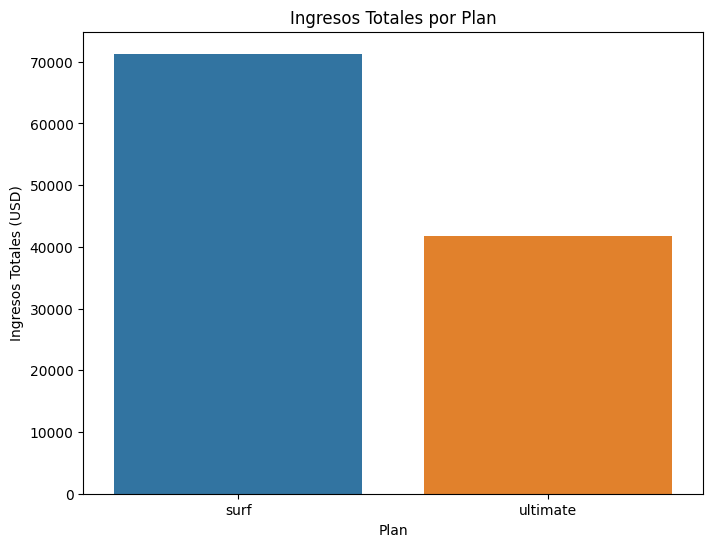

In [81]:
# Distribución de ingresos
# Ingresos totales por plan
total_revenue_by_plan = final_df_with_plans.groupby('plan_name')['monthly_income'].sum().reset_index()
print("\nIngresos Totales por Plan:\n", total_revenue_by_plan)

plt.figure(figsize=(8, 6))
sns.barplot(x='plan_name', y='monthly_income', data=total_revenue_by_plan)
plt.title('Ingresos Totales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Totales (USD)')
plt.show()


Ingreso Promedio por Usuario por Plan:
   plan_name  monthly_income
0      surf       60.415839
1  ultimate       72.248705


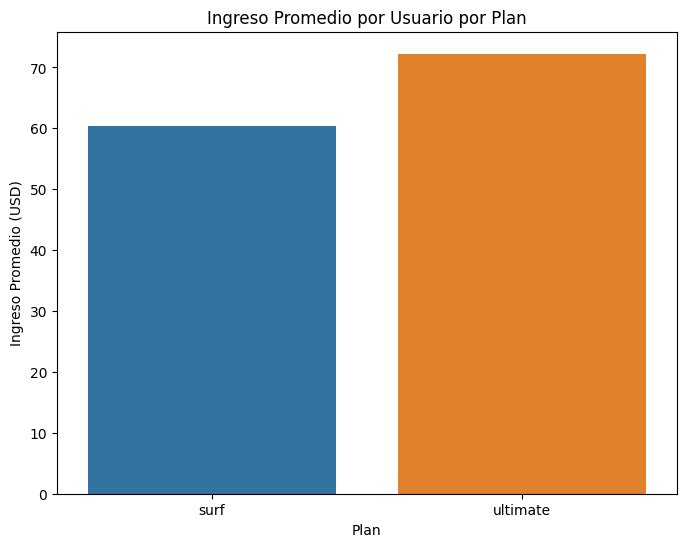

In [82]:
# Ingreso promedio por usuario por plan
average_revenue_per_user = final_df_with_plans.groupby('plan_name')['monthly_income'].mean().reset_index()
print("\nIngreso Promedio por Usuario por Plan:\n", average_revenue_per_user)

plt.figure(figsize=(8, 6))
sns.barplot(x='plan_name', y='monthly_income', data=average_revenue_per_user)
plt.title('Ingreso Promedio por Usuario por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Promedio (USD)')
plt.show()

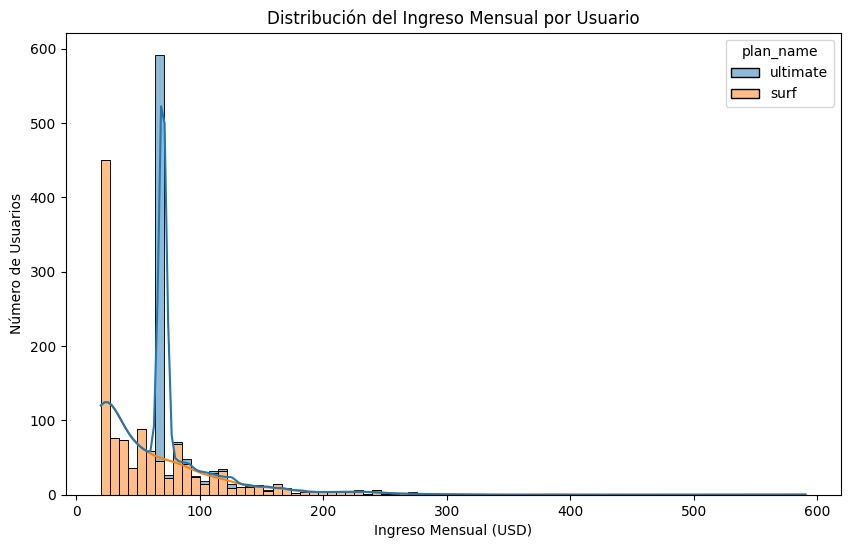

In [83]:
# Distribución del ingreso mensual por usuario (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df_with_plans, x='monthly_income', hue='plan_name', kde=True, multiple='stack')
plt.title('Distribución del Ingreso Mensual por Usuario')
plt.xlabel('Ingreso Mensual (USD)')
plt.ylabel('Número de Usuarios')
plt.show()

- El pico del plan Ultimate de 70 USD obedece al pago mensual base. Gran cantidad de usuarios no incurren en muchos cargos adicionales por exceso de minutos, SMS o datos; su pago mensual total es el costo base del plan.
- El pico del plan Surf está alrededor de los 50 USD. Aunque el costo del Plan Surf es de 20 USD, la diferencia de 30 USD (50 - 20) corresponde al promedio que paga cargos adicionales por exceso de uso (minutos, SMS y mmás probablemente datos debido a que el exceso en datos cuesta 10 USD/GB).

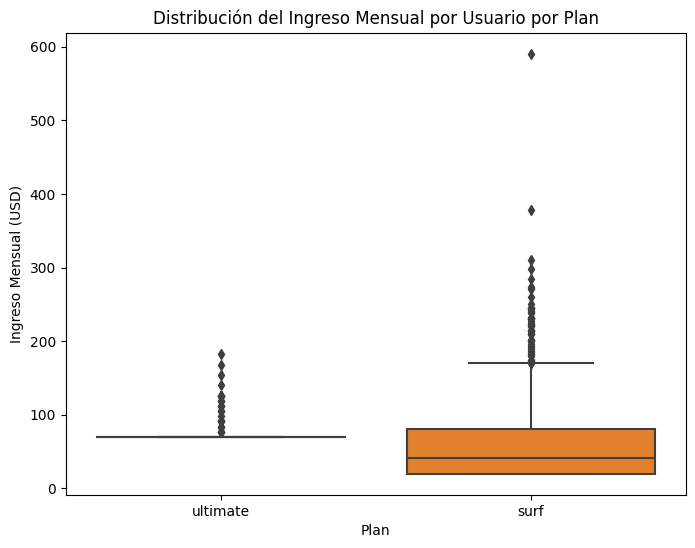

In [84]:
# Distribución del ingreso mensual por usuario (diagrama de caja)
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan_name', y='monthly_income', data=final_df_with_plans)
plt.title('Distribución del Ingreso Mensual por Usuario por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual (USD)')
plt.show()


Cantidad de Clientes por Plan:
   plan_name  user_id
0      surf      333
1  ultimate      157


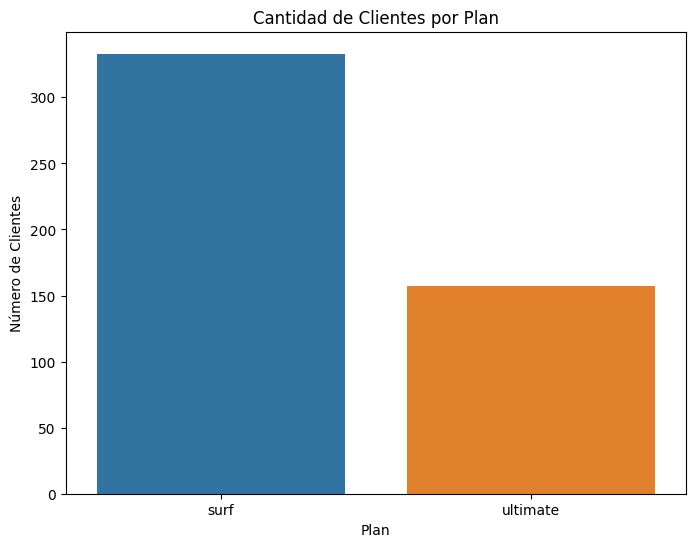

In [85]:
# Cantidad de clientes por plan
customer_count_by_plan = final_df_with_plans.groupby('plan_name')['user_id'].nunique().reset_index()
print("\nCantidad de Clientes por Plan:\n", customer_count_by_plan)

plt.figure(figsize=(8, 6))
sns.barplot(x='plan_name', y='user_id', data=customer_count_by_plan)
plt.title('Cantidad de Clientes por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Clientes')
plt.show()

| Concepto                        | Total (Ambos Planes) | Surf         | Ultimate     |
| ------------------------------- | -------------------- | ------------ | ------------ |
| Usuarios                        | 500                  | 333          | 157          |
| Ingreso Anual Total             | \$113,122.69.00      | \$71,290.69  | \$41,832.00  |

- 📦Ingreso real:
  - Ingreso total anual por ambos planes: usd 133,122.69
  - Ingreso total anual por el plan Surf: usd 71,290.69
  - Ingreso total anual por el plan Ultimate: usd 41,832.00 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El análisis se realizó de manera adecuada para cada métrica y redactaste correctamente cada conclusión a partir de cada gráfica, esta es una práctica importante a mantener para que el proceso de análisis sea mucho más claro en tus proyectos
</div>

## Prueba las hipótesis estadísticas

### Hipótesis 1

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

- Hipótesis:
  - Hipótesis Nula (H0): No hay diferencia significativa en los ingresos promedio entre los usuarios de los planes "Ultimate" y "Surf". Matemáticamente, μ_surf = μ_ultimate (donde μ representa la media).
  - Hipótesis Alternativa (H1): Hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes "Ultimate" y "Surf". Matemáticamente, μ_surf ≠ μ_ultimate. (Esta es una prueba de dos colas porque estamos interesados en detectar cualquier diferencia, ya sea que "Surf" genere más o menos ingresos que "Ultimate").

- Prueba estadística
  - Shapiro-Wilk: comprueba normalidad en cada grupo.
  - Levene: comprueba si las varianzas son iguales (decide Student vs Welch).
  - Prueba t: compara las medias con equal_var según Levene.
  - Interpretación: rechaza o no H₀ según p-valor < 0.05.
  - Mann-Whitney U: alternativa no paramétrica si falla normalidad.

- Determinar el Valor Alfa (α):

  -  Valor alfa (α) es la probabilidad máxima en la que estamos dispuestos a aceptar para rechazar la hipótesis nula cuando es verdadera (error de tipo I).

  - Valor común para alfa es 0.05. Estamos dispuestos a aceptar un 5% de probabilidad de concluir que hay una diferencia en los ingresos promedio cuando, en realidad, no la hay.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las pruebas estadísticas no pueden darte cómo resultado un `nan`, eso quiere decir que el cálculo no se realizó de manera adecuada. Esto suele suceder cuando se está pasando al módulo `ttest` por ejemplo listas con datos vacíos o con datos `NaN` causando que el módulo no logre hacer el cálculo correcto. 
    
La segunda prueba estadística se debe aplicar comparando los ingresos por ciudades, ya sólo falta este cambio para completar tu proyecto!
</div>

In [87]:
import pandas as pd
from scipy import stats

# df
df = final_df_with_plans

# Limpiar filas con ingresos 0 o plan faltante
df_clean = (
    df
    .dropna(subset=['monthly_income_rounded', 'plan_name'])
    .copy()
)

# Columna de ingreso numérica
df_clean['monthly_income_rounded'] = pd.to_numeric(
    df_clean['monthly_income_rounded'],
    errors='coerce'
)
df_clean = df_clean.dropna(subset=['monthly_income_rounded'])

print("Resumen descriptivo de ingresos por plan:\n")
print(
    df_clean
    .groupby('plan_name')['monthly_income_rounded']
    .agg(count='count', mean='mean', median='median', std='std')
    .round(2)
)

# Muestras
surf_inc = df_clean.loc[df_clean['plan_name'] == 'surf',    'monthly_income_rounded']
ult_inc  = df_clean.loc[df_clean['plan_name'] == 'ultimate','monthly_income_rounded']

# (Shapiro-Wilk) - normalidad
print("\nShapiro-Wilk Test de normalidad:")
print(" Surf     :", stats.shapiro(surf_inc))
print(" Ultimate :", stats.shapiro(ult_inc))

# Levene - varianzas iguales (Student vs Welch)
print("\nComprobación de igualdad de varianzas (Levene):")
levene_res = stats.levene(surf_inc, ult_inc)
print("\nLevene Test de igualdad de varianzas:", levene_res)
    
# Prueba t - medias con equal_var. 
# Levene-muestras independientes (Welch o Student según varianzas)
equal_var = levene_res.pvalue > 0.05
t_res = stats.ttest_ind(surf_inc, ult_inc, equal_var=equal_var)
print(f"\nPrueba t-independientes (equal_var={equal_var}):")
print(f"  t = {t_res.statistic:.4f}, p = {t_res.pvalue:.4f}")

# Rechaza o no H₀ (p-valor < 0.05)
alpha = 0.05
if t_res.pvalue < alpha:
    print("→ Rechazamos H₀: existe diferencia significativa entre Surf y Ultimate.")
else:
    print("→ No se rechaza H₀: no hay evidencia de diferencia.")

    
# (Mann-Whitney U) respaldo de prueba u alternativa no paramétrica - si falla normalidad.
mw_res = stats.mannwhitneyu(surf_inc, ult_inc, alternative='two-sided')
print("\nMann-Whitney U (alternativa bilateral):", mw_res)
if mw_res.pvalue < alpha:
    print("→ Rechazamos H₀ (Mann-Whitney): existe diferencia significativa.")
else:
    print("→ No se rechaza H₀ (Mann-Whitney).")



Resumen descriptivo de ingresos por plan:

           count   mean  median    std
plan_name                             
surf        1180  60.68    41.5  53.65
ultimate     579  72.25    70.0  11.03

Shapiro-Wilk Test de normalidad:
 Surf     : ShapiroResult(statistic=0.7506340146064758, pvalue=7.39168404609462e-39)
 Ultimate : ShapiroResult(statistic=0.21068042516708374, pvalue=8.96831017167883e-44)

Comprobación de igualdad de varianzas (Levene):

Levene Test de igualdad de varianzas: LeveneResult(statistic=341.5776559778309, pvalue=7.821502571837199e-70)

Prueba t-independientes (equal_var=False):
  t = -7.1053, p = 0.0000
→ Rechazamos H₀: existe diferencia significativa entre Surf y Ultimate.

Mann-Whitney U (alternativa bilateral): MannwhitneyuResult(statistic=212550.5, pvalue=1.744655013412245e-39)
→ Rechazamos H₀ (Mann-Whitney): existe diferencia significativa.


Si hay diferencia entre planes Ultimate y Surf. El plan Ultimate tienen un ingreso medio de usd 72.25, más alto que surf de usd 60.68. Se confirma con la prueba t de Welch (p < 0.001) y la prueba no paramétrica Mann–Whitney U (p < 0.001).

📌 Interpretación:
Los usuarios del plan Ultimate tienen ingresos mensuales mayores a los de Surf.
La diferencia es significativa (p < 0.001) seguramente por el plan de perfil diferenciado o status mayor

| Comparación entre planes | Ultimate | Surf | Resultado |
|--------------------------|----------|------|-----------|
| **Ingreso promedio (USD)** | 72.25    | 60.68 | 🔺 Ultimate más alto |
| **Mediana (USD)**          | 70.00    | 41.50 | 🔺 Ultimate más alto |
| **Prueba t (Welch)**       | –        | –     | ✅ p < 0.001 — diferencia significativa |
| **Mann–Whitney U**         | –        | –     | ✅ p < 0.001 — diferencia significativa |


### Hipótesis 2

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

- Hipótesis:
  - Hipótesis Nula (H0): No hay diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones. Matemáticamente, μ_ny_nj = μ_otras_regiones (donde μ representa la media).
  - Hipótesis Alternativa (H1): Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones. Matemáticamente, μ_ny_nj ≠ μ_otras_regiones. (Esta es una prueba de dos colas).

- Prueba estadística
  - Filtro ciudades NY y NJ.
  - Estadísticas descriptiva.
  - Normalidad y varianzas.
  - Prueba t de Welch.
  - Mann–Whitney U.

- Determinar el Valor Alfa (α):

  -  Valor alfa (α) es la probabilidad máxima en la que estamos dispuestos a aceptar para rechazar la hipótesis nula cuando es verdadera (error de tipo I).

  - Valor común para alfa es 0.05. Estamos dispuestos a aceptar un 5% de probabilidad de concluir que hay una diferencia en los ingresos promedio cuando, en realidad, no la hay.

In [88]:
# DF final
df = final_df_with_plans

# Limpiar
df_clean = df.dropna(subset=['monthly_income_rounded', 'user_city']).copy()
df_clean['monthly_income_rounded'] = pd.to_numeric(df_clean['monthly_income_rounded'], errors='coerce')
df_clean = df_clean.dropna(subset=['monthly_income_rounded'])

# Clasificar NY–NJ usando palabras clave en la ciudad
ny_nj_mask = df_clean['user_city'].str.contains('NY|New York|NJ|Jersey', case=False, na=False)

ny_nj_income = df_clean.loc[ny_nj_mask, 'monthly_income_rounded']
otras_income = df_clean.loc[~ny_nj_mask, 'monthly_income_rounded']

print("Cantidad de observaciones:")
print(f" NY-NJ: {len(ny_nj_income)}")
print(f" Otras: {len(otras_income)}")

print("\nDescriptivas:")
print(" NY-NJ:\n", ny_nj_income.describe().round(2))
print(" Otras:\n", otras_income.describe().round(2))

# Prueba normalidad
print("\nShapiro-Wilk (normalidad):")
print(" NY-NJ :", stats.shapiro(ny_nj_income))
print(" Otras :", stats.shapiro(otras_income))

# Igualdad varianzas
levene_res = stats.levene(ny_nj_income, otras_income)
print("\nLevene (varianzas iguales):", levene_res)

# Prueba t de Welch
equal_var = levene_res.pvalue > 0.05
t_test = stats.ttest_ind(ny_nj_income, otras_income, equal_var=equal_var)

print(f"\nPrueba t (equal_var={equal_var}):")
print(f"  t = {t_test.statistic:.4f}, p = {t_test.pvalue:.4f}")

# Alpha
alpha = 0.05
if t_test.pvalue < alpha:
    print("→ Rechazamos H₀: hay diferencia significativa entre ingresos NY-NJ y otras regiones.")
else:
    print("→ No se rechaza H₀: no hay evidencia suficiente de diferencia.")

# Prueba no paramétrica
mw_test = stats.mannwhitneyu(ny_nj_income, otras_income, alternative='two-sided')
print("\nMann-Whitney U:", mw_test)
if mw_test.pvalue < alpha:
    print("→ Rechazamos H₀ (Mann-Whitney): existe diferencia significativa.")
else:
    print("→ No se rechaza H₀ (Mann-Whitney).")

Cantidad de observaciones:
 NY-NJ: 382
 Otras: 1377

Descriptivas:
 NY-NJ:
 count    382.00
mean      62.43
std       43.34
min       20.00
25%       22.25
50%       60.00
75%       70.75
max      274.00
Name: monthly_income_rounded, dtype: float64
 Otras:
 count    1377.00
mean       65.06
std        45.09
min        20.00
25%        30.00
50%        70.00
75%        70.00
max       591.00
Name: monthly_income_rounded, dtype: float64

Shapiro-Wilk (normalidad):
 NY-NJ : ShapiroResult(statistic=0.844736635684967, pvalue=5.8020598834062e-19)
 Otras : ShapiroResult(statistic=0.7509635090827942, pvalue=2.491929059108822e-41)

Levene (varianzas iguales): LeveneResult(statistic=4.084476708873466, pvalue=0.04343024844182222)

Prueba t (equal_var=False):
  t = -1.0383, p = 0.2995
→ No se rechaza H₀: no hay evidencia suficiente de diferencia.

Mann-Whitney U: MannwhitneyuResult(statistic=246537.0, pvalue=0.05584829096029833)
→ No se rechaza H₀ (Mann-Whitney).


Si bien es cierto que los usuarios del área NY–NJ poseen un ingreso medio levemente menor de usd 62.43 con respecto a las otras regiones (usd 65.06), no se encuebntra mayor significancia distintiva.
La prueba t de Welch (p = 0.2995) y la prueba no paramétrica Mann–Whitney U (p ≈ 0.056) arrojan como resultado que no se puede rechazar la hipótesis nula.

📌 Interpretación:
No existe evidencia suficiente a nivel estadístico para indicar que los usuarios de NY–NJ difieren sobre manera en relación con los ingresos promedio del resto del país.

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

1- Los datos de uso e ingresos de los clientes de Megaline tienen una dinámica compleja en la distribución de ingresos (Surf y Ultimate). 
   - Ambos planes contribuyen de forma importante a los ingresos totales pero su estructura y formas de ingreso propias de cada plan difieren notablemente.

2 - Megaline depende mucho de los cargos por excedentes (aprox. el 84% del total proveniene de estos)
 - Indica que el modelo de negocio actual se beneficia mucho de los usuarios que sobrepasan sus sevicios por encima de los límites del plan.
- Esta dependencia de excedentes es particular en Surf, el cual genera la mayor parte de ingresos (más del 90% proveniente de cargos por excedentes). Los límites del plan Surf pueden ser relativamente bajos en comparación con las necesidades de los usuarios; o, los usuarios de son más propensos a subestimar su consumo.
- Ultimate también genera una parte importante de ingresos por excedentes y contibuye con su tarifa básica más alta. Pero se mantienen dentro de los límites del plan aunado a su tarifa más alta.

3- Las pruebas estadísticas confirman que existe una diferencia significativa en la distribución de los ingresos entre ambos planes. Amerita de una estrategia de precios y marketing diferenciada para cada segmento de clientes.

4- Decisiones clave y suposiciones:
- Limpieza y reprocesamiento de datos ( evita pasar por alto errores sutiles como el tipo de datos).
- El análisis mensual simplifica el estudio, pero implica pérdida de información granular como patrones de uso diario, semanal o pòr horas. Podrían ocultarse tendencias relevantes.
- Cálculo de excedentes: se basan en la suposición de que Megaline aplica de manera consistente las reglas y tarifas específicas de cada plan.
- Agrupación regional: agrupación de las ciudades en las categorías "NY-NJ" y "Otras" simplifica análisis, pero puede encubrir variaciones dentro de la categoría "Otras".
- Pruebas Estadísticas: Pruebas t de Student y Welch se basan en la suposición de normalidad de los datos (donde lo amerita) e independencia de muestras.
- Cálculo de ingresos: se basa en la precisión de aplicar precios específicos de cada plan, mediante la correcta asignación de  usuarios según el plan.

5- Implicaciones para Megaline:
- Equilibrio entre ingresos y satisfacción del Cliente: 
  - Se debe encontrar equilibrio entre maximizar ingresos por excedentes y asegurar satisfacción del cliente. Si se depende mucho de los excedentes puede generar insatisfacción y aumentar tasa de abandono.
  - Revisar límites del plan Surf: No depender tanto del plan Surf en sus excedentes. se puede considerar aumentar límites para reducir probabilidad de que los usuarios incurran en cargos adicionales y mejorar satisfacción del cliente.
  - Upselling: ofrecer incentivos a usuarios Surf para que migren a Ultimate, que ofrece un mayor y adecuado margen de límite.
  - Downselling: ofrecer incentivos a usuarios Ultimate para que migren a Sur u otro plan intermedio si no vana aprovechar lasd extras de Ultimate de forma óptima y podría generarles un ahorro y mayor satisfacción (fidelizar).
  - Estrategias de marketing dirigidas: segmentar clientes y ofrecer planes que mejor se adapten a sus necesidades. Ultimate para usuarios con un alto consumo de datos y Surf para usuarios más sensibles al precio y consumo moderado.
  - Análisis Constante del comportamiento del usuario para observar patrones de uso y sensibilidad al precio, de forma que se logren optimizar las estrategias de precios y ofertas de planes a largo plazo (Time Life Value)

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios realizados Marcel! Ahora se adecuaron los datos acorde al funcionamiento de la empresa descrito en el brief del proyecto así los análisis son más acertados.  Así cómo también se corrigieron los errores de ejecución de la iteración anterior.
    
Las pruebas estadísticas son una parte importante de la comprobación de hipótesis, siempre procura revisar los datos que estás usando antes de aplicarlos.
    
Procura llevarte las prácticas vistas en este proyecto de utilizar markdown para dejar títulos, separar secciones y sobre todo dejar las conclusiones de cada gráfica, cálculo o sección realizada ya que así el proceso de análisis es mucho más claro. Saludos!
</div>